# <center><u><font color='red'>Projet 4 : Anticipez les besoins en consommation électrique de bâtiments</font></u></center>

Lecerf Defer Amandine

explication colonne :
- 2015 : https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m 
- 2016 : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

## <font color='green'>Fonctions utilisées</font>

In [ ]:
def info_generales(dataframe):
  dataframe.info()
  print(" ")
  print(" ")
  print(" ")

  lignes = dataframe.shape[0] 
  colonnes = dataframe.shape[1]
  print("Le jeu de données a {} lignes et {} colonnes.".format(lignes,colonnes))


In [ ]:
def pie_NaN(dataframe):

  lignes = dataframe.shape[0] 
  colonnes = dataframe.shape[1]

  # nombre de données non manquante
  nb_data = dataframe.count().sum()

  # nombre de données totale de ce jeu de données (colonnes*lignes)
  nb_totale = (colonnes*lignes)

  #taux remplissage jeu de données
  rate_dataOK = (nb_data/nb_totale)
  print("Le jeux de données est rempli à {:.2%}".format(rate_dataOK))
  print("et il a {:.2%} de données manquantes".format(1-rate_dataOK))
  print(" ")
  print(" ")

     
  # Pie Plot
  rates = [rate_dataOK, 1 - rate_dataOK]
  labels = ["Données", "NAN"]

  explode =(0,0.1) 
  colors = ['gold', 'pink']

  # Plot
  plt.figure(figsize=(12,15))
  plt.pie(rates, explode=explode, labels=labels, colors=colors, autopct='%.2f%%', shadow=True, textprops={'fontsize': 26})

  ttl=plt.title("Taux de remplissage du jeu de données", fontsize = 32)
  ttl.set_position([0.5, 0.85])

  plt.axis('equal')
  #ax.legend(labels, loc = "upper right", fontsize = 18)
  plt.tight_layout() 

  plt.show()


In [ ]:
def graphe_remplissage_variable(dataframe):
  # Répartition du taux de remplissage des colonnes: 
  df = pd.DataFrame(round(dataframe.shape[0] - dataframe.isna().sum())/dataframe.shape[0],columns=['Taux de remplissage']).sort_values('Taux de remplissage', ascending=False).reset_index()
  fig, ax = plt.subplots(figsize=(10,30))
  sns.barplot(y=df['index'], x='Taux de remplissage', data=df)
  plt.title('Taux de remplissage des variables - %', fontsize = 30)
  plt.show()

In [ ]:
def duplicate(dataframe) :
  before = len(dataframe)
  dataframe = dataframe.drop_duplicates(subset='OSEBuildingID')
  after = len(dataframe)
  print("Il y a {} duplicats qui ont été retirés du jeu de données" .format(before-after))
  return dataframe

In [ ]:
def filtration_colonnes(dataframe, taux_remplissage):
    dataframe = dataframe.replace(to_replace = '^nan$', value = np.nan, regex=True)
    indexes = []
    #nombre de colonnes à l'origine
    nb_colonne = dataframe.shape[1]
    for col_name in dataframe.columns.tolist():
        taux_data_colonne = (dataframe[col_name].shape[0] - dataframe[col_name].isna().sum())/dataframe[col_name].shape[0]  # taux de remplissage pour chaque colonne : (nombredeligne-nombredeNANparcolonne)/nombredeligne
        if taux_data_colonne < taux_remplissage:   #Filtration des colonnes dont le remplissage est supérieur à la limite
          dataframe.drop(col_name, axis = 1, inplace=True) 
    #nombre de colonnes au final
    nb_colonne_supp = nb_colonne - dataframe.shape[1]
    print("Nombre de colonnes avec un taux de remplissage supérieur à {:.2%} : {} colonnes.".format(taux_remplissage, dataframe.shape[1]))
    print("Nombre de colonnes supprimées : {} colonnes".format(nb_colonne_supp))
    print(" ")
    print(" ")

    return dataframe

In [ ]:
from scipy.stats import variation

def description_var(df):
  for col in df :
    colData=df[col]
    moyenne=np.mean(colData)
    mediane = np.median(colData)
    Q1 = np.percentile(colData, 25)
    Q3 = np.percentile(colData, 75)
    max = colData.max()
    min = colData.min()
    variance = np.var(colData)
    ecartType = np.std(colData)
    skew=pd.DataFrame(colData).skew()[0]
    kurt=pd.DataFrame(colData).kurtosis()[0]

    print("Mesures statistiques pour la variable {}" .format(col))
    print(" ")
    print("La moyenne de la variable {} est : {} ".format(col,round(moyenne, 2)))
    print("La mediane de la variable {} est : {} ".format(col,round(mediane, 2)))
    print("Quartile Q1 vaut : {} ".format(round(Q1, 2)))
    print("Quartile Q3 vaut : {} ".format(round(Q3, 2)))
    print("Le maximum vaut : {} ".format(max))
    print("Le minimum vaut : {} ".format(min))
    print(" ")
    print(" ")
    print("Mesures de dispersion pour la variable {}" .format(col))
    print(" ")
    print("La variance de la variable {} est : {} " .format(col,round(variance, 2)))
    print("L'écart type de la variable {} est : {} " .format(col,round(ecartType, 2)))
    print("Le coefficient de variation de la variable {} est de : {}" .format(col,round(variation(colData),2))) 
    print("L'écart interquartile de la variable {} est de : {} " .format(col,round(Q3-Q1, 2)))
    print(" ")
    print(" ")
    print("Mesures de forme pour la variable {}" .format(col))
    print(" ")
    print("Le skewewness empirique pour la variable {} est de {} " .format(col,round(skew, 4)))
    if (skew==0):
      print("La distribution de la variable {} est symétrique." .format(col))
    elif (skew>0):
      print("La distribution de la variable {} est étalée vers la droite." .format(col))
    else:
      print("La distribution de la variable {} est étalée vers la gauche." .format(col))
    print(" ")
    print("Le Kurtosis empirique pour la variable {} est de {} " .format(col, round(kurt, 4)))
    if kurt==0:
      print("La distribution de la variable {} a le même applatissement que la distribution normale." .format(col))
    elif kurt>0:
      print("La distribution de la variable {} est moins applatie que la distribution normale, les observations sont plus concentrées." .format(col))
    else:
      print("La distribution de la variable {} est plus applatie que la distribution normale, les observations sont moins concentrées." .format(col))
    print(" ")
    plt.figure(figsize=(10,8))
    df[col].hist(color = 'pink', edgecolor = 'red', log = True, )
    plt.title("Représentation statistique de la variable {}".format(col))
    plt.show()
    print(" ")
    print("Boxplot pour la variable {}".format(col))
    plt.figure(figsize=(6,6))
    df.boxplot(column=[col], return_type='axes', vert=True, showfliers=False, showcaps=True, patch_artist=True, color='tan', medianprops={'linestyle': '-', 'linewidth': 2, 'color': 'red'}, whiskerprops={'linestyle': '-', 'linewidth': 2, 'color' : 'blue'}, capprops={'linestyle': '-', 'linewidth': 2, 'color':'blue'})
    plt.show()
    print(" ")
    print(" ")

## <font color='green'>Mise en place de l'environnement de travail</font>

### <font color='blue'>Bibliothèque</font>

In [ ]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

import missingno as msno


pd.options.mode.chained_assignment = None

In [ ]:
pd.options.display.width = 0


### <font color='blue'>A exécuter si utilisation de google colab</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Data_projet_OC
!ls

/content/drive/My Drive/Data_projet_OC
2015-building-energy-benchmarking.csv
2016-building-energy-benchmarking.csv
concat_data_2015_2016.csv
df_CO2_elec.csv
feature_important.csv
results_Emis.csv
results_interest_STAR_score.csv
results_Use.csv
socrata_metadata_2015-building-energy-benchmarking.json
socrata_metadata_2016-building-energy-benchmarking.json


### <font color='blue'>JSON : MetaDAta</font>

In [ ]:
import json
from pandas.io.json import json_normalize

with open('/content/drive/MyDrive/Data_projet_OC/socrata_metadata_2015-building-energy-benchmarking.json') as f:
    json_2015 = json.load(f)
    data_json_2015 = json_normalize(json_2015)

In [ ]:
data_json_2015

,id,name,assetType,attribution,attributionLink,averageRating,createdAt,description,displayType,downloadCount,hideFromCatalog,hideFromDataJson,indexUpdatedAt,licenseId,newBackend,numberOfComments,oid,provenance,publicationAppendEnabled,publicationDate,publicationGroup,publicationStage,rowsUpdatedAt,rowsUpdatedBy,tableId,totalTimesRated,viewCount,viewLastModified,viewType,approvals,columns,grants,rights,tags,flags,license.name,metadata.rdfSubject,metadata.jsonQuery.order,metadata.custom_fields.Department.Department,metadata.custom_fields.Refresh Frequency.Frequency,metadata.availableDisplayTypes,metadata.renderTypeConfig.visible.table,owner.id,owner.displayName,owner.screenName,owner.type,owner.userSegment,owner.flags,query.orderBys,tableAuthor.id,tableAuthor.displayName,tableAuthor.screenName,tableAuthor.type,tableAuthor.userSegment,tableAuthor.flags
0,h7rm-fz6m,2015 Building Energy Benchmarking,dataset,City of Seattle,http://www.seattle.gov/environment,0,1492461362,Seattle’s Building Energy Benchmarking and Rep...,table,2546,False,False,1551379229,PUBLIC_DOMAIN,True,0,28249767,official,False,1521489624,14152737,published,1521489255,9yyf-ecsx,14945997,0,4217,1557955129,tabular,"[{'reviewedAt': 1521489624, 'reviewedAutomatic...","[{'id': 350402298, 'name': 'OSEBuildingID', 'd...","[{'inherited': False, 'type': 'viewer', 'flags...",[read],"[building, eui, benchmarking, energy, electric...","[default, restorable, restorePossibleForType]",Public Domain,0,"[{'columnFieldName': 'seattlebuildingid', 'asc...",Office of Sustainability and Environment,Annually,"[table, fatrow, page]",True,9yyf-ecsx,"Sullivan, Terry","Sullivan, Terry",interactive,site_member,[acceptedEula],"[{'ascending': True, 'expression': {'columnId'...",9yyf-ecsx,"Sullivan, Terry","Sullivan, Terry",interactive,site_member,[acceptedEula]


In [ ]:
with open('/content/drive/MyDrive/Data_projet_OC/socrata_metadata_2016-building-energy-benchmarking.json') as f:
    json_2016 = json.load(f)
    data_json_2016 = json_normalize(json_2016)

In [ ]:
data_json_2016

,id,name,assetType,attribution,attributionLink,averageRating,createdAt,description,displayType,downloadCount,hideFromCatalog,hideFromDataJson,indexUpdatedAt,licenseId,newBackend,numberOfComments,oid,provenance,publicationAppendEnabled,publicationDate,publicationGroup,publicationStage,rowIdentifierColumnId,rowsUpdatedAt,rowsUpdatedBy,tableId,totalTimesRated,viewCount,viewLastModified,viewType,approvals,columns,grants,rights,tags,flags,license.name,metadata.sidebar.width,metadata.custom_fields.Department.Department,metadata.custom_fields.Refresh Frequency.Frequency,metadata.rowIdentifier,metadata.rowLabel,metadata.availableDisplayTypes,metadata.renderTypeConfig.visible.table,owner.id,owner.displayName,owner.screenName,owner.type,owner.userSegment,owner.flags,tableAuthor.id,tableAuthor.displayName,tableAuthor.screenName,tableAuthor.type,tableAuthor.userSegment,tableAuthor.flags
0,2bpz-gwpy,2016 Building Energy Benchmarking,dataset,City of Seattle,https://www.seattle.gov/energybenchmarking,0,1521070051,Seattle’s Building Energy Benchmarking and Rep...,table,2024,False,False,1521490072,PUBLIC_DOMAIN,True,0,28218043,official,False,1521071079,14936543,published,349768636,1521071078,9yyf-ecsx,14936543,0,2234,1557954938,tabular,"[{'reviewedAt': 1521071079, 'reviewedAutomatic...","[{'id': 349768636, 'name': 'OSEBuildingID', 'd...","[{'inherited': False, 'type': 'viewer', 'flags...",[read],"[building, eui, energy, steam, electricity, gr...","[default, restorable, restorePossibleForType]",Public Domain,482,Office of Sustainability and Environment,Annually,349768636,Building,"[table, fatrow, page]",True,9yyf-ecsx,"Sullivan, Terry","Sullivan, Terry",interactive,site_member,[acceptedEula],9yyf-ecsx,"Sullivan, Terry","Sullivan, Terry",interactive,site_member,[acceptedEula]


Les fichiers json ne sont pas utiles pour la suite des analyses car il ne donnent que des informations générales sur les fichiers et l'obtention des données.

### <font color='blue'>CSV</font>

#### <font color='purple'> Importation </font>

In [ ]:
#usefulcols_=['OSEBuildingID','BuildingType','PrimaryPropertyType','PropertyName','YearBuilt','ENERGYSTARScore','SiteEnergyUse(kBtu)','GHGEmissions(MetricTonsCO2e)']
data2015= pd.read_csv('/content/drive/MyDrive/Data_projet_OC/2015-building-energy-benchmarking.csv')
data2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122...",2,DOWNTOWN,2000,1,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,0.0,7.97,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,"{'latitude': '47.65752471', 'longitude': '-122...",4,NORTHEAST,2014,1,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,0.0,30.69,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,"{'latitude': '47.61649845', 'longitude': '-122...",7,DOWNTOWN,2015,1,40.0,319481,41915,277566,"Multifamily Housing, Parking",NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
#usefulcols=['OSEBuildingID','BuildingType','PrimaryPropertyType','PropertyName','YearBuilt','ENERGYSTARScore','SiteEnergyUse(kBtu)','TotalGHGEmissions']
data2016= pd.read_csv('/content/drive/MyDrive/Data_projet_OC/2016-building-energy-benchmarking.csv')
data2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

#### <font color='purple'> Informations Générales </font>

In [ ]:
info_generales(data2015)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [ ]:
info_generales(data2016)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

#### <font color='purple'> Données Manquantes </font>

In [ ]:
data2015.isna().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
Location                                                            0
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      8
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(

In [ ]:
data2016.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


Le jeux de données est rempli à 83.11%
et il a 16.89% de données manquantes
 
 


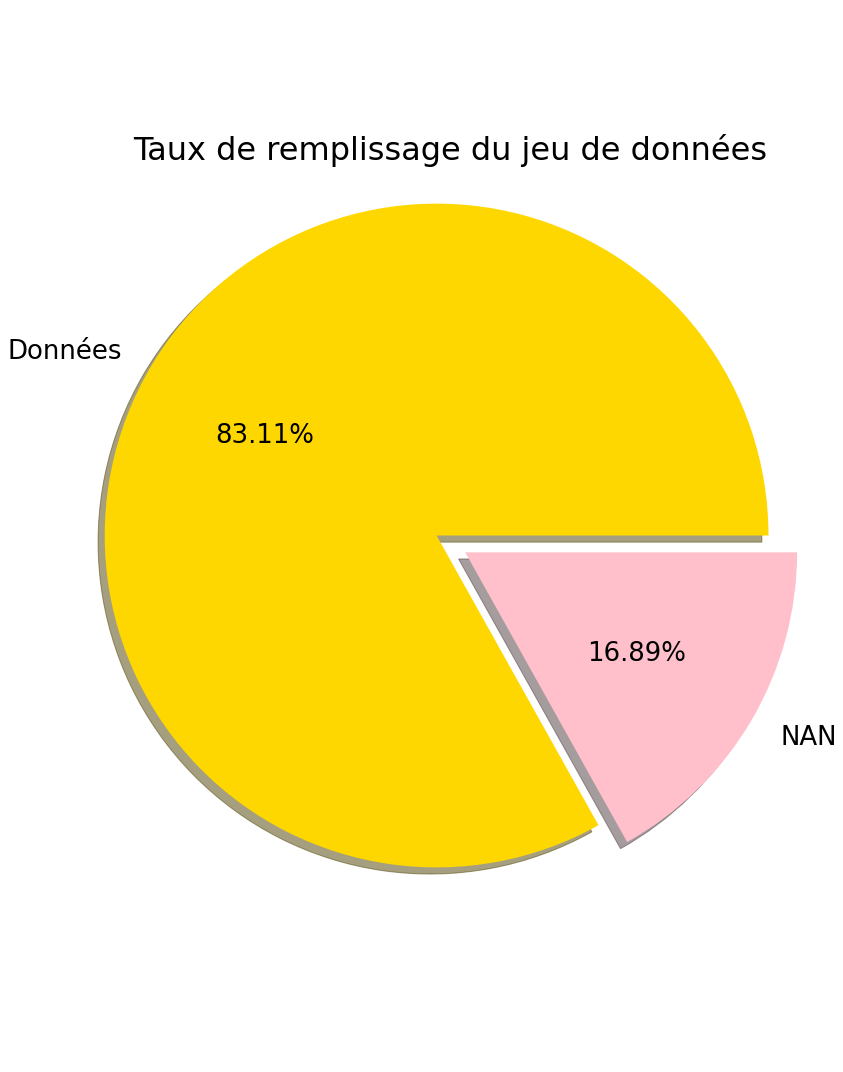

In [ ]:
pie_NaN(data2015)

Le jeu de données datant de 2015 a plus de 16,8% de données manquantes.

Le jeux de données est rempli à 87.15%
et il a 12.85% de données manquantes
 
 


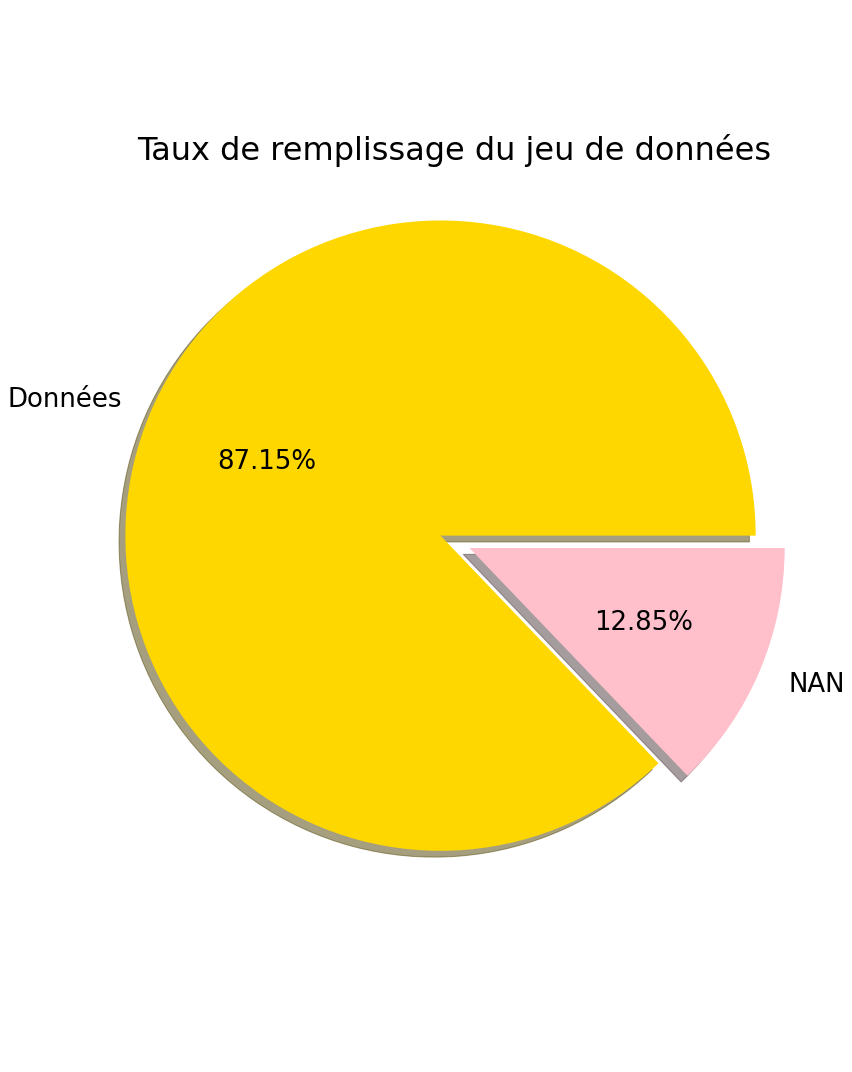

In [ ]:
pie_NaN(data2016)

Le jeu de données datant de 2016 a plus de 12,8% de données manquantes.

#### <font color='purple'> Répartition des données entre les variables des colonnes </font>

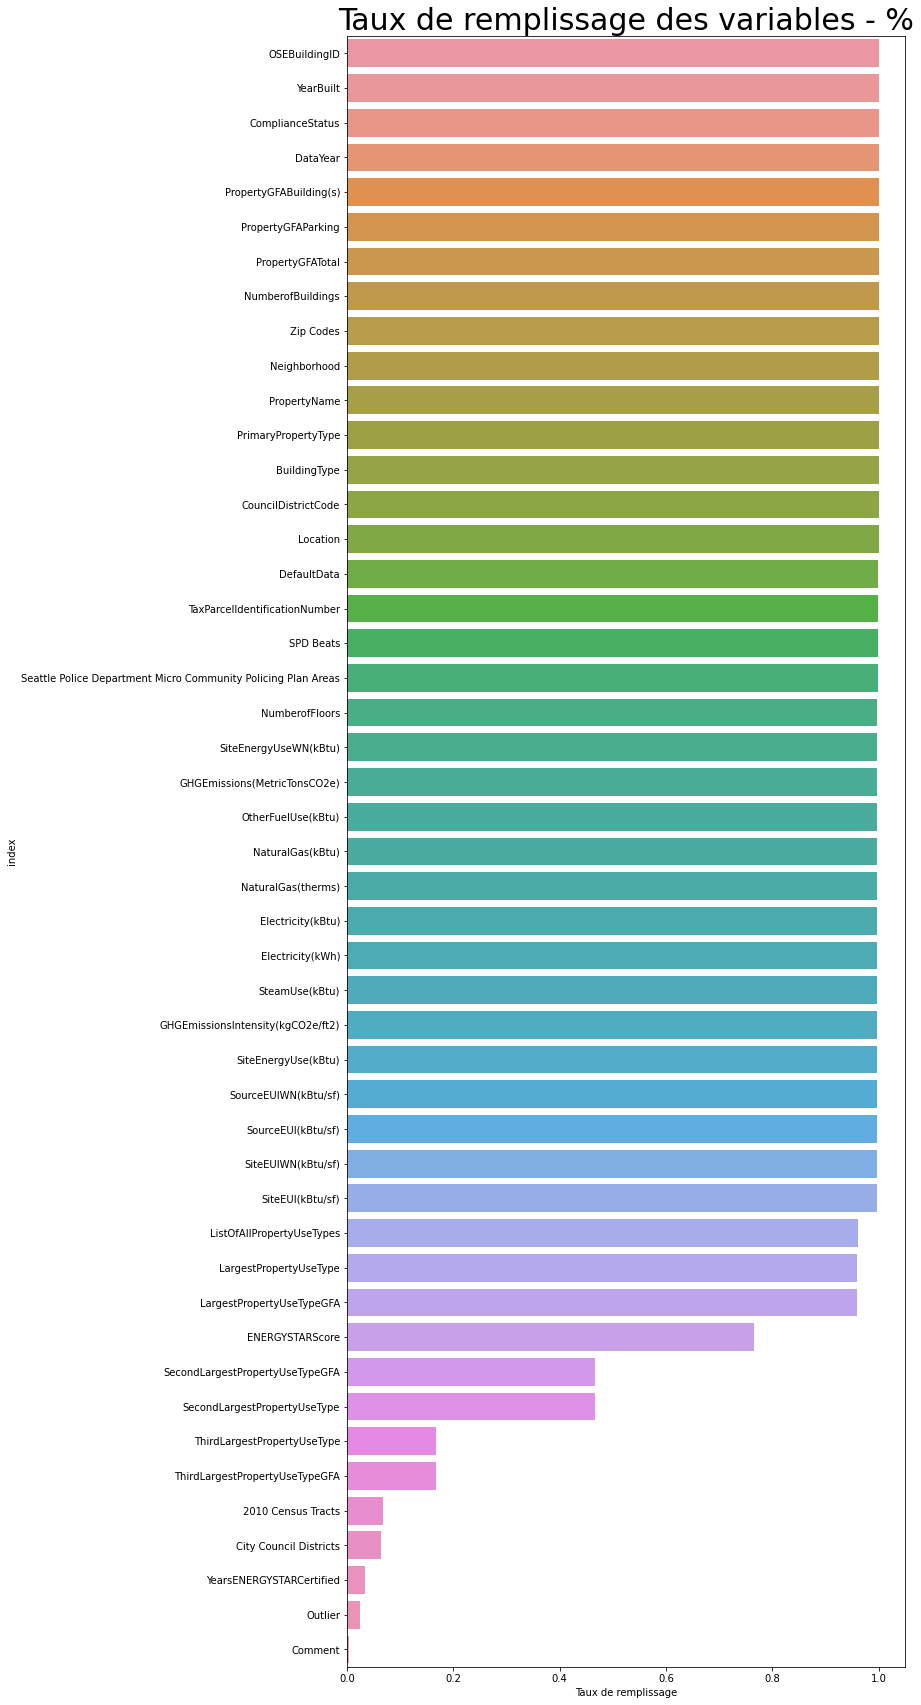

In [ ]:
graphe_remplissage_variable(data2015)

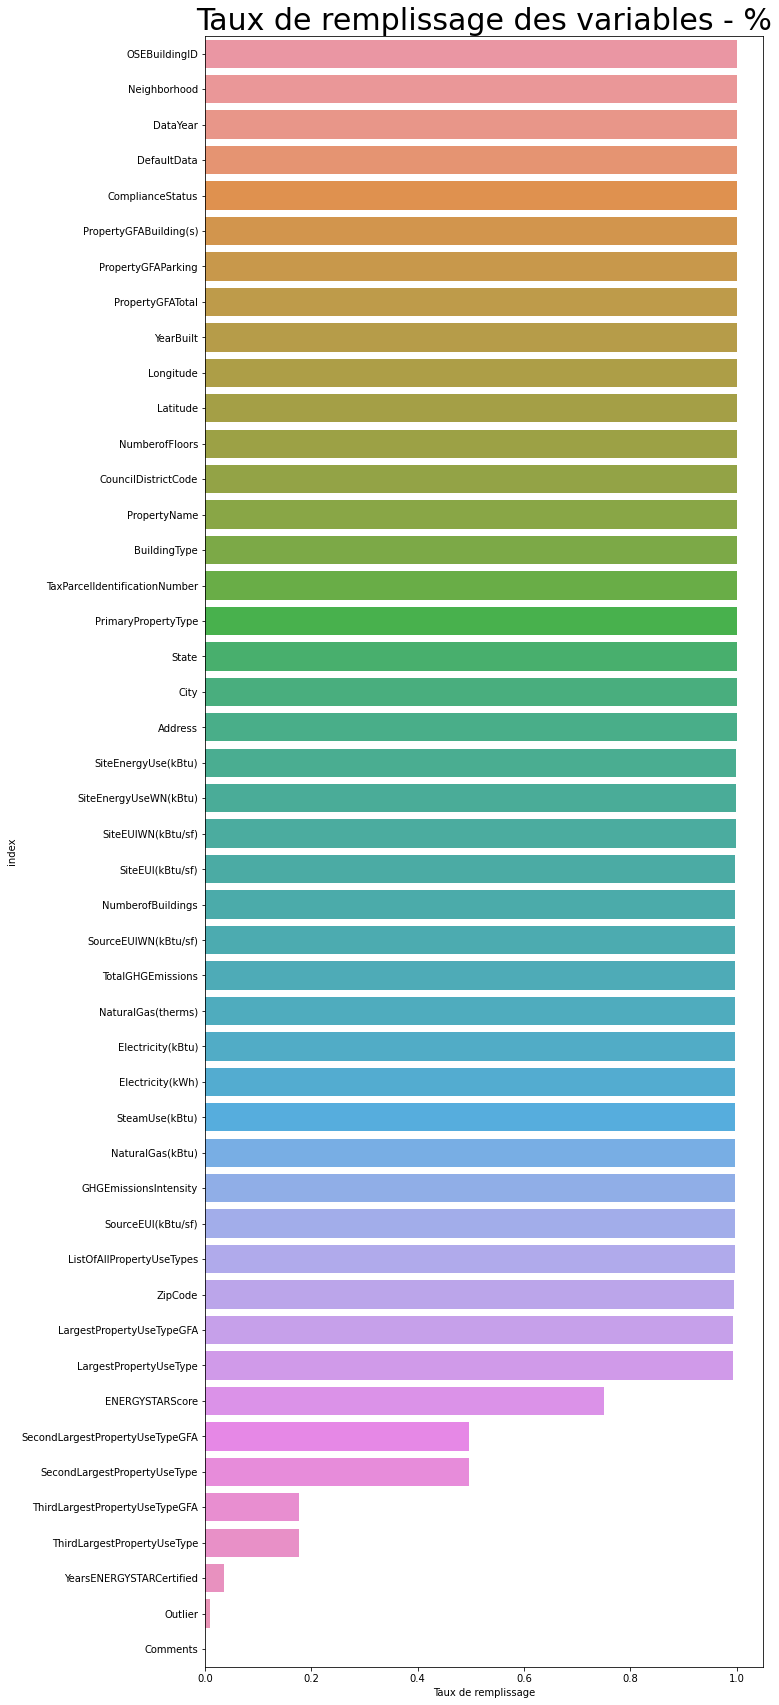

In [ ]:
graphe_remplissage_variable(data2016)

Pour chacun des datasets, on peut dire que les colonnes sont bien remplies mais certaines ont très peu de données.

#### <font color='purple'>colonnes de chaque dataset</font>

In [ ]:
#colonnes de 2015
colonnes_2015= set(data2015.columns)
colonnes_2015

{'2010 Census Tracts',
 'BuildingType',
 'City Council Districts',
 'Comment',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'Location',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'OtherFuelUse(kBtu)',
 'Outlier',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 '

In [ ]:
#colonnes de 2016
colonnes_2016=set(data2016.columns)
colonnes_2016

{'Address',
 'BuildingType',
 'City',
 'Comments',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'GHGEmissionsIntensity',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'Latitude',
 'ListOfAllPropertyUseTypes',
 'Longitude',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'Outlier',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'State',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'TotalGHGEmissions',
 'YearBuilt',
 'YearsENERGYSTARCertified',
 'ZipCode'}

#### <font color='purple'>colonnes communes aux datasets</font>

In [ ]:
#colonnes en commun entre 2015 et 2016
colonnes_communes= colonnes_2015.intersection(colonnes_2016)
colonnes_communes

{'BuildingType',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'Outlier',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearBuilt',
 'YearsENERGYSTARCertified'}

In [ ]:
len(colonnes_communes)

37

Il y a 37 colonnes communes aux deux jeux de données.

#### <font color='purple'>colonnes spécifiques à chaque dataset</font>

In [ ]:
#colonnes de 2016 que l'on ne retrouve pas dans les colonnes communes = spécifiques à 2016
uniques_2016= colonnes_2016.difference(colonnes_communes)
uniques_2016

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [ ]:
#Dataframe ne contenant que les colonnes spécifiques à 2016
dataframe_2016_uniq_col= data2016[list(uniques_2016)]
dataframe_2016_uniq_col

,City,GHGEmissionsIntensity,Comments,Latitude,TotalGHGEmissions,ZipCode,Address,State,Longitude
0,Seattle,2.83,NaN,47.61220,249.98,98101.0,405 Olive way,WA,-122.33799
1,Seattle,2.86,NaN,47.61317,295.86,98101.0,724 Pine street,WA,-122.33393
2,Seattle,2.19,NaN,47.61393,2089.28,98101.0,1900 5th Avenue,WA,-122.33810
3,Seattle,4.67,NaN,47.61412,286.43,98101.0,620 STEWART ST,WA,-122.33664
4,Seattle,2.88,NaN,47.61375,505.01,98121.0,401 LENORA ST,WA,-122.34047
...,...,...,...,...,...,...,...,...,...
3371,Seattle,1.70,NaN,47.56722,20.94,NaN,1600 S Dakota St,WA,-122.31154
3372,Seattle,2.01,NaN,47.59625,32.17,NaN,719 8th Ave S,WA,-122.32283
3373,Seattle,16.99,NaN,47.63644,223.54,NaN,1920 1st Ave W,WA,-122.35784
3374,Seattle,1.57,NaN,47.52832,22.11,NaN,8319 8th Ave S,WA,-122.32431


In [ ]:
#colonnes de 2015 que l'on ne retrouve pas dans les colonnes communes = spécifiques à 2015
uniques_2015= colonnes_2015.difference(colonnes_communes)
uniques_2015

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [ ]:
#Dataframe ne contenant que les colonnes spécifiques à 2015
dataframe_2015_uniq_col= data2015[list(uniques_2015)]
dataframe_2015_uniq_col

,Location,OtherFuelUse(kBtu),Comment,Zip Codes,GHGEmissions(MetricTonsCO2e),SPD Beats,GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts
0,"{'latitude': '47.61219025', 'longitude': '-122...",0.0,NaN,18081,249.43,31.0,2.64,NaN,14.0,NaN
1,"{'latitude': '47.61310583', 'longitude': '-122...",0.0,NaN,18081,263.51,31.0,2.38,NaN,14.0,NaN
2,"{'latitude': '47.61334897', 'longitude': '-122...",0.0,NaN,18081,2061.48,31.0,1.92,NaN,56.0,NaN
3,"{'latitude': '47.61421585', 'longitude': '-122...",0.0,NaN,18081,1936.34,31.0,31.38,NaN,56.0,NaN
4,"{'latitude': '47.6137544', 'longitude': '-122....",0.0,NaN,19576,507.70,31.0,4.02,NaN,56.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3335,"{'latitude': '47.59950256', 'longitude': '-122...",0.0,NaN,18379,7.97,16.0,0.07,NaN,26.0,NaN
3336,"{'latitude': '47.65752471', 'longitude': '-122...",0.0,NaN,18383,30.69,38.0,0.61,NaN,60.0,NaN
3337,"{'latitude': '47.61649845', 'longitude': '-122...",0.0,NaN,19576,627.97,7.0,1.89,NaN,56.0,NaN
3338,"{'latitude': '47.68396954', 'longitude': '-122...",0.0,NaN,18792,5.42,48.0,0.04,NaN,55.0,NaN


## <font color='green'>Concaténation des deux datasets</font>


#### <font color='purple'>Décomposition et création de nouvelles colonnes pour les adresses </font>

In [ ]:
data_2015=data2015.copy()

In [ ]:
data_2016=data2016.copy()

Dans le fichier représentant les données de l'année 2016, il y a une colonne pour l'adresse, une pour la city, une pour le state, une pour la longitude et une pour la latitude.

In [ ]:
data_2016['Address']

0          405 Olive way
1        724 Pine street
2        1900 5th Avenue
3         620 STEWART ST
4          401 LENORA ST
              ...       
3371    1600 S Dakota St
3372       719 8th Ave S
3373      1920 1st Ave W
3374      8319 8th Ave S
3375    2820 S Myrtle St
Name: Address, Length: 3376, dtype: object

In [ ]:
data_2016['City']

0       Seattle
1       Seattle
2       Seattle
3       Seattle
4       Seattle
         ...   
3371    Seattle
3372    Seattle
3373    Seattle
3374    Seattle
3375    Seattle
Name: City, Length: 3376, dtype: object

In [ ]:
data_2016['State']

0       WA
1       WA
2       WA
3       WA
4       WA
        ..
3371    WA
3372    WA
3373    WA
3374    WA
3375    WA
Name: State, Length: 3376, dtype: object

In [ ]:
data_2016['Longitude']

0      -122.33799
1      -122.33393
2      -122.33810
3      -122.33664
4      -122.34047
          ...    
3371   -122.31154
3372   -122.32283
3373   -122.35784
3374   -122.32431
3375   -122.29536
Name: Longitude, Length: 3376, dtype: float64

In [ ]:
data_2016['Latitude']

0       47.61220
1       47.61317
2       47.61393
3       47.61412
4       47.61375
          ...   
3371    47.56722
3372    47.59625
3373    47.63644
3374    47.52832
3375    47.53939
Name: Latitude, Length: 3376, dtype: float64

In [ ]:
data_2016['ZipCode']

0       98101.0
1       98101.0
2       98101.0
3       98101.0
4       98121.0
         ...   
3371        NaN
3372        NaN
3373        NaN
3374        NaN
3375        NaN
Name: ZipCode, Length: 3376, dtype: float64

Alors que pour le fichier des données de l'année 2015, il n'y a qu'une colonne "Location" qui regroupe la latitude, la longitude, l'adresse, la city, le state et le zip code.


In [ ]:
for row in data_2015['Location']:
    print(row)

{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
{'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{"address": "620 STEWART ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
{'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{"address": "401 LENORA ST", "city": "SEATTLE", "state": "WA", "zip": "98121"}'}
{'latitude': '47.6164389', 'longitude': '-122.33676431', 'human_address': '{"address": "810 VIRGINIA ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
{'latitude': '47.6141141', 'longitude': '-122.33274086', 'hum

In [ ]:
data_2015['Zip Codes']

0       18081
1       18081
2       18081
3       18081
4       19576
        ...  
3335    18379
3336    18383
3337    19576
3338    18792
3339    18792
Name: Zip Codes, Length: 3340, dtype: int64

On peut voir que le zip Code (code de la région) des données pour 2015 ne correspond pas au zip code de la ville contenu dans la variable Location. On peut donc supprimer cette colonne.

In [ ]:
data_2015.drop(columns=["Zip Codes"],inplace=True)

On peut désormais découper la variable Location en de nouvelles variables Longitude, Latitude, Address, City, State, Zip_Code.

In [ ]:
# Construct an object from a string : transforme chaque ligne en dictionnaire puis il permet d'extraire pour chaque ligne les infos que l'on veut
import ast

latitude=[]
longitude=[]
complete_adress = []
for row in data_2015['Location']:
    dict_row=ast.literal_eval(row)
    latitude.append(dict_row['latitude'])
    longitude.append(dict_row['latitude'])
    complete_adress.append(dict_row['human_address'])

data_2015['Latitude']=latitude
data_2015['Longitude']=longitude
data_2015['human_address']=complete_adress



In [ ]:
import ast

address=[]
city=[]
state = []
zip=[]
for row in data_2015['human_address']:
    dict_row=ast.literal_eval(row)
    address.append(dict_row['address'])
    city.append(dict_row['city'])
    state.append(dict_row['state'])
    zip.append(dict_row['zip'])

data_2015['Address']=address
data_2015['City']=city
data_2015['State']=state
data_2015['Zip_Code']=zip


In [ ]:
data_2015.drop('Location', axis=1, inplace=True)
data_2015.drop('human_address', axis=1, inplace=True)

In [ ]:
data_2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Latitude,Longitude,Address,City,State,Zip_Code
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,47.61219025,47.61219025,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,47.61310583,47.61310583,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,47.61334897,47.61334897,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,47.61421585,47.61421585,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,47.6137544,47.6137544,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,2,DOWNTOWN,2000,1,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,0.0,7.97,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,47.59950256,47.59950256,321 10TH AVE S,SEATTLE,WA,98104
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,4,NORTHEAST,2014,1,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,0.0,30.69,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,47.65752471,47.65752471,4123 12TH AVE NE,SEATTLE,WA,98105
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,7,DOWNTOWN,2015,1,40.0,319481,41915,277566,"Multifamily Housing, Parking",NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,52.7,61.4,93.1,102.2,168

#### <font color='purple'>Renommer nom de colonnes</font>

Homogénéisation pour le nom de la colonne Zip Code

In [ ]:
data_2016.rename({'ZipCode': 'Zip_Code'}, axis=1, inplace=True)
data_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,Zip_Code,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmi

#### <font color='purple'>Modification de type</font>

In [ ]:
data_2016.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
Zip_Code                           float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

Dans le fichier 2016, le Zip_Code est considéré comme un décimal alors qu'il devrait être catégorisé en "object" pour pouvoir nous permettre de faire de potentiels regroupements. Il faut donc modifier son type.

In [ ]:
data_2016['Zip_Code']=data_2016['Zip_Code'].astype('object')

In [ ]:
#data_2016.dtypes

In [ ]:
data_2015.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                                 int64
PropertyGFABuilding(s)                             

In [ ]:
data_2015[['Latitude', 'Longitude']] = data_2015[['Latitude', 'Longitude']].astype(float)

Pour 2015, la latitude et la longitude sont considérées comme objet alors que celles-ci devraient être des floats.

#### <font color='purple'>Analyse des colonnes spécifiques à chaque données</font>

In [ ]:
column_2015= set(data_2015.columns)
column_2016=set(data_2016.columns)
common_columns= column_2015.intersection(column_2016)
len(common_columns)

43

Il y a 43 colonnes en commun entre les données de 2015 et les données de 2016.  

In [ ]:
unique_2015= column_2015.difference(common_columns)
unique_2015

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas'}

Cependant, il y a encore 8 colonnes spécifiques aux données de 2015.

In [ ]:
unique_2016= column_2016.difference(common_columns)
unique_2016

{'Comments', 'GHGEmissionsIntensity', 'TotalGHGEmissions'}

Et 3 colonnes spécifiques aux données de 2016.

Il faut voir s'il est possible de faire une correspondance entre les colonnes de 2015 et de 2016 car il se pourrait que des colonnes indiquent la même chose mais sous un nom différent.

In [ ]:
#Lorsque l'on regarde la définition des colonnes, on remarque que la colonne GHGEmissions(MetricTonsCO2e) de 2015 correspond à la colonne TotalGHGEmissions de 2016 
#et la colonne GHGEmissionsIntensity(kgCO2e/ft2) de 2015 correspond à la colonne GHGEmissionsIntensity de 2016
#on garde la notation de 2016
data_2015.rename({'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions', 'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity', 'Comment':'Comments'}, axis=1, inplace=True)

In [ ]:
column_2015= set(data_2015.columns)
column_2016=set(data_2016.columns)
common_columns= column_2015.intersection(column_2016)
len(common_columns)

46

On voit que les colonnes ont bien été renommées car désormais, il y a 46 colonnes communes aux deux fichiers.

#### <font color='purple'>Vérification de la présence de doublons</font>

In [ ]:
short_data_cleaned = duplicate(data_2015)

Il y a 0 duplicats qui ont été retirés du jeu de données


In [ ]:
short_data_cleaned = duplicate(data_2016)

Il y a 0 duplicats qui ont été retirés du jeu de données


#### <font color='purple'>Concaténation des deux fichiers</font>

In [ ]:
concat_data_2015_2016=pd.concat([data_2015, data_2016], ignore_index=True, axis=0, sort=False)
concat_data_2015_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Latitude,Longitude,Address,City,State,Zip_Code
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,47.612190,47.612190,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,47.613106,47.613106,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,47.613349,47.613349,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,47.614216,47.614216,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.100000,122.100000,228.800000,227.100000,1.482910e+07,1.507824e+07,0.0,1.777841e+06,6.066245e+06,87631.000000,8.763105e+06,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,47.613754,47.613754,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,NaN,20.94,1.70,True,NaN,Error - Correct Default Data,NaN,NaN,NaN,NaN,NaN,47.567220,-122.311540,1600 S Dakota St,Seattle,WA,NaN
6712,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,NaN,32.17,2.01,False,NaN,Compliant,NaN,NaN,NaN,NaN,NaN,47.596250,-122.322830,719 8t

In [ ]:
concat_data_2015_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 51 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  6716 non-null   int64  
 1   DataYear                                                       6716 non-null   int64  
 2   BuildingType                                                   6716 non-null   object 
 3   PrimaryPropertyType                                            6716 non-null   object 
 4   PropertyName                                                   6716 non-null   object 
 5   TaxParcelIdentificationNumber                                  6714 non-null   object 
 6   CouncilDistrictCode                                            6716 non-null   int64  
 7   Neighborhood                                                

 
## <font color='green'>Nettoyage</font>


### <font color='blue'>Reflexions </font>

#### <font color='purple'>Définition colonnes </font>

In [ ]:
list(concat_data_2015_2016)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 '2010 Census Tracts',
 'Seattle Police Department Micro 

* OSEBuildingID = identifiant unique attribué par Seattle à chaque propriété.

* DataYear = Année des données

* BuildingType = Classification des types de la propriété 

* PrimaryPropertyType = Utilisation principale de la propriété

* PropertyName = Nom du bâtiment

* TaxParcelIdentificationNumber = Code PIN du comté de King

* CouncilDistrictCode = Code du conseil municipal de la ville

* Neighborhood = Quartier de la propriété

* YearBuilt = Année de construction

* NumberofBuildings = Nombre de bâtiments inclus dans la propriété (cf campus composé de plusieurs bâtiments)

* NumberofFloors = Nombre d'étages de la propriété

* PropertyGFATotal = Surface brute totale du bâtiment et du parking.

* PropertyGFAParking = Surface totale de tous les parkings

* PropertyGFABuilding(s) = Surface totale du bâtiment. 

* ListOfAllPropertyUseTypes = Liste des utilisations des biens immobiliers 

* LargestPropertyUseType = Utilisation la plus importante d'un bien immobilier (ex : bureau, magasin)

* LargestPropertyUseTypeGFA = Surface de l'utilisation la plus importante du bien

* SecondLargestPropertyUseType = La deuxième plus grande utilisation d'un bien immobilier

* SecondLargestPropertyUseTypeGFA = Surface de l'utilisation la deuxième plus importante du bien

* ThirdLargestPropertyUseType = La troisième plus grande utilisation d'un bien immobilier
* ThirdLargestPropertyUseTypeGFA = Surface de l'utilisation la troisième plus importante du bien


* YearsENERGYSTARCertified = Année de certification ENERGY STAR.

* ENERGYSTARScore = Performance énergétique globale d'une propriété


* SiteEUI(kBtu/sf) = Consommation d'énergie : Quantité annuelle d'énergie consommée par le site 

* SiteEUIWN(kBtu/sf) = Quantité d’énergie que le bien immobilier aurait consommée dans des conditions météorologiques moyennes sur 30 ans. 

* SourceEUI(kBtu/sf) = La quantité d’énergie annuelle utilisée pour l'exploitation du bien, y compris les pertes dues à la production, au transport et à la distribution. 

* SourceEUIWN(kBtu/sf) = Quantité d'énergie de la source que la propriété aurait consommée dans des conditions météorologiques moyennes sur 30 ans. 

* SiteEnergyUse(kBtu) = La quantité annuelle d'énergie consommée par le bien, toutes sources d'énergie confondues

* SiteEnergyUseWN(kBtu) = La quantité annuelle d'énergie consommée par le bien, toutes sources d'énergie confondues, ajustée à ce que le bien aurait consommé dans des conditions météorologiques moyennes sur 30 ans.

* SteamUse(kBtu) = Quantité annuelle de vapeur consommée par le bâtiment

* Electricity(kBtu) = Quantité annuelle d'électricité consommée par la propriété, y compris l'électricité achetée au réseau et produite par des systèmes renouvelables sur place

* Electricity(kWh) = Quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée au réseau et produite par des systèmes renouvelables sur place

* NaturalGas(therms) = Quantité annuelle de gaz naturel consommée par le bien

* NaturalGas(kBtu) = Quantité annuelle de gaz naturel consommée par le bien en milliers d'unités thermiques britanniques (kBtu).

* OtherFuelUse(kBtu) = autres carburants utilisés

* TotalGHGEmissions = Quantité totale d'émissions de gaz à effet de serre rejetée dans l'atmosphère à la suite de la consommation d'énergie sur le site, mesurée en tonnes d'équivalent dioxyde de carbone. 


* GHGEmissionsIntensity = Total des émissions de gaz à effet de serre divisé par la surface brute de la propriété, mesurée en kilogrammes d'équivalent dioxyde de carbone par pied carré. 

* DefaultData = La propriété a utilisé des données par défaut pour au moins une caractéristique de la propriété.

* Comments = Commentaires pour fournir un contexte à la consommation d'énergie du bâtiment

* ComplianceStatus = Si un bien immobilier a satisfait aux exigences en matière d'analyse comparative de la consommation d'énergie pour l'année en cours.

* Outlier = La donnée est-elle une valeur aberrante ?

* 2010 Census Tracts = recensement datant de 2010 

* Seattle Police Department Micro Community Policing Plan Areas = plans élaborés en réunissant l'engagement communautaire et les données sur la criminalité et en orientant les services de police vers les besoins individuels de chaque communauté.

* City Council Districts = Districts du conseil municipal

* SPD Beats = à quelle station de police est relié le bâtiment 

* Latitude = latitude du bâtiment

* Longitude = longitude du bâtiment

* Address = adresse du bâtiment

* City = ville où se trouve le bâtiment

* State = état où se trouve le bâtiment

* Zip_Code = code zip du bâtiment






#### <font color='purple'>Quelles colonnes garder ? </font>

In [ ]:
len(concat_data_2015_2016.columns)

51

Les 51 variables du fichier peuvent être regroupées en grands domaines. On peut dire, entre-autre, que des variables traitent le thème de l'énergie, de l'émission de CO2, d'autres, le thème de la santé publique, des informations sur le bâtiment et sa localisation et de l'administration publique.

Au vu de notre problématique, il ne faut garder que les variables traitant des domaines de l'énergie, de l'émission de CO2 et les informations sur le bâtiment et sa localisation. De plus, certaines variables traitent du même sujet mais avec des unités de mesure différentes. Il faut donc choisir les variables de façon à avoir la même unité de mesure.



On peut garder les variables suivantes :
* OSEBuildingID
* DataYear
* BuildingType
* PrimaryPropertyType
* PropertyName
* Neighborhood
* YearBuilt
* PropertyGFATotal
* ENERGYSTARScore
* SiteEUI(kBtu/sf)
* SourceEUI(kBtu/sf) 
* SiteEnergyUse(kBtu)
* SteamUse(kBtu)
* Electricity(kBtu)
* NaturalGas(kBtu)
* OtherFuelUse(kBtu)
* Latitude
* Longitude
* Address
* City
* State
* Zip_Code

Après réflexion, je ne garderai que 22 variables selon leur taux de données manquantes.

#### <font color='purple'>Quelles lignes garder ? </font>

In [ ]:
concat_data_2015_2016['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

La problématique ne se concentre que sur les bâtiments non destinés à l'habitation donc non résidentiels.
Dans notre analyse, il faut donc garder les bâtiments de types : 

* NonResidential
* Nonresidential COS (commerces)
* SPS-District K-12 (écoles publiques)
* Campus
* Nonresidential WA

### <font color='blue'>informations sur le dataset concaténé </font>

#### <font color='purple'> Informations générales </font>

In [ ]:
info_generales(concat_data_2015_2016)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 51 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  6716 non-null   int64  
 1   DataYear                                                       6716 non-null   int64  
 2   BuildingType                                                   6716 non-null   object 
 3   PrimaryPropertyType                                            6716 non-null   object 
 4   PropertyName                                                   6716 non-null   object 
 5   TaxParcelIdentificationNumber                                  6714 non-null   object 
 6   CouncilDistrictCode                                            6716 non-null   int64  
 7   Neighborhood                                                

#### <font color='purple'> Données Manquantes </font>

##### <font color='olive'> **Répartition**</font>

In [ ]:
concat_data_2015_2016.isna().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   8
NumberofFloors                                                      8
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(s)                                              0
ListOfAllPropertyUse

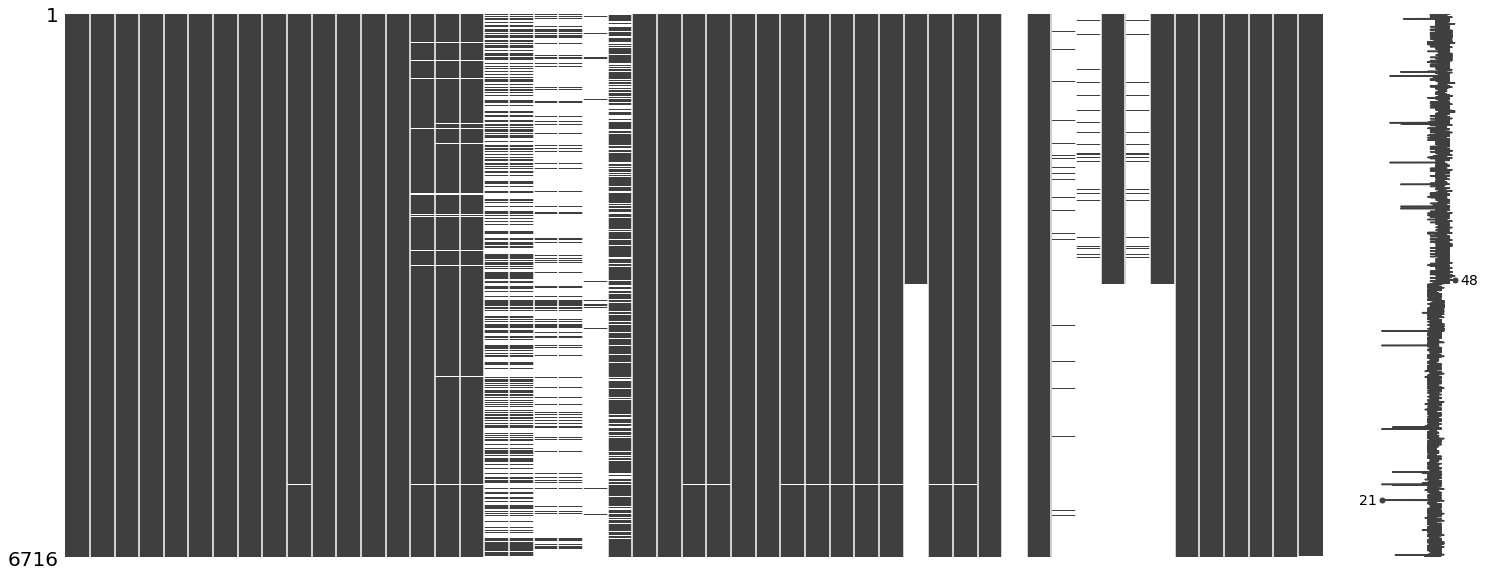

In [ ]:
msno.matrix(concat_data_2015_2016)
#msno.matrix(data, sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))
#msno.bar(data, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12) 
#msno.heatmap(data, cmap="RdYlGn", figsize=(10,5), fontsize=12) 

On remarque qu'il y a quelques données manquantes dans notre jeu de données concaténé. Certaines colonnes sont à moitié vides, certaines sont très peu remplies alors que d'autres sont complètes. Ce graphique nous permet de voir globalement la répartition des données manquantes mais on ne connaît pas exactement le taux de données manquantes dans le jeu de données.

##### <font color='olive'> ***Taux***</font>

Le jeux de données est rempli à 81.51%
et il a 18.49% de données manquantes
 
 


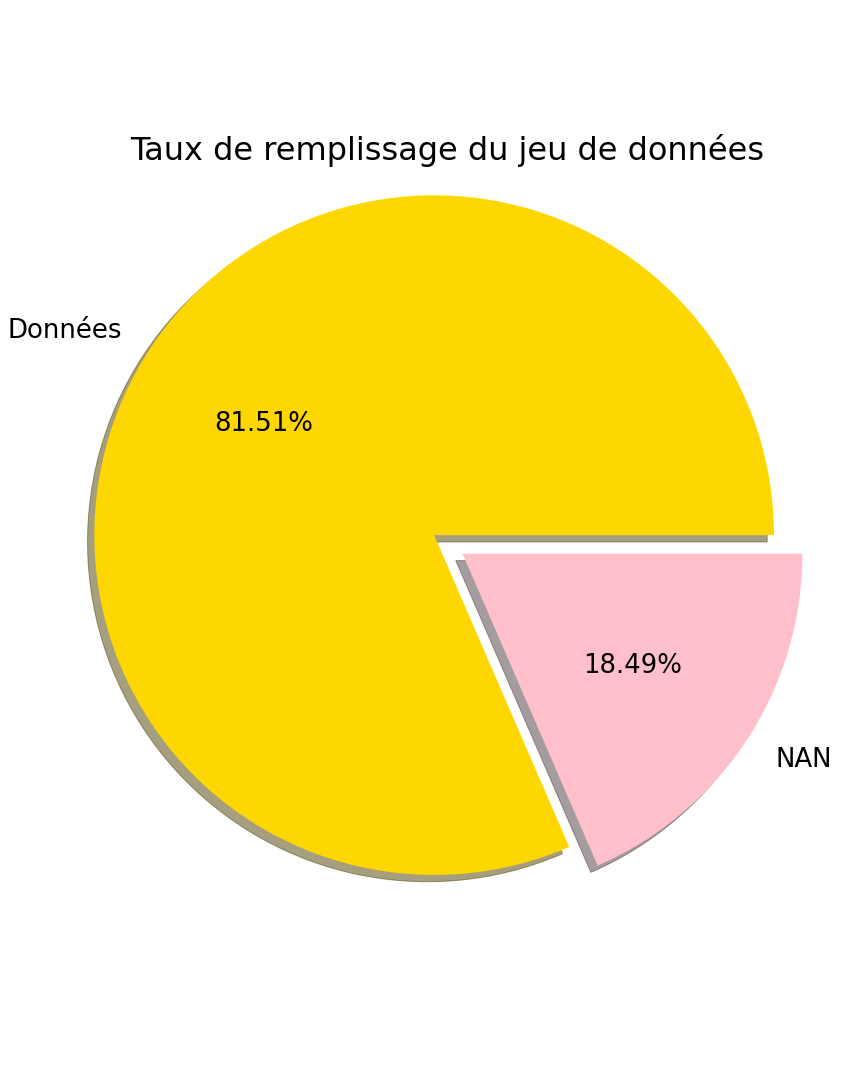

In [ ]:
pie_NaN(concat_data_2015_2016)

Après avoir vu la répartition de nos données manquantes, on peut plus précisément dire que notre jeu de données concaténé est composé à 18.49% de données manquantes.  

#### <font color='purple'> Répartition des données entre les variables des colonnes </font>

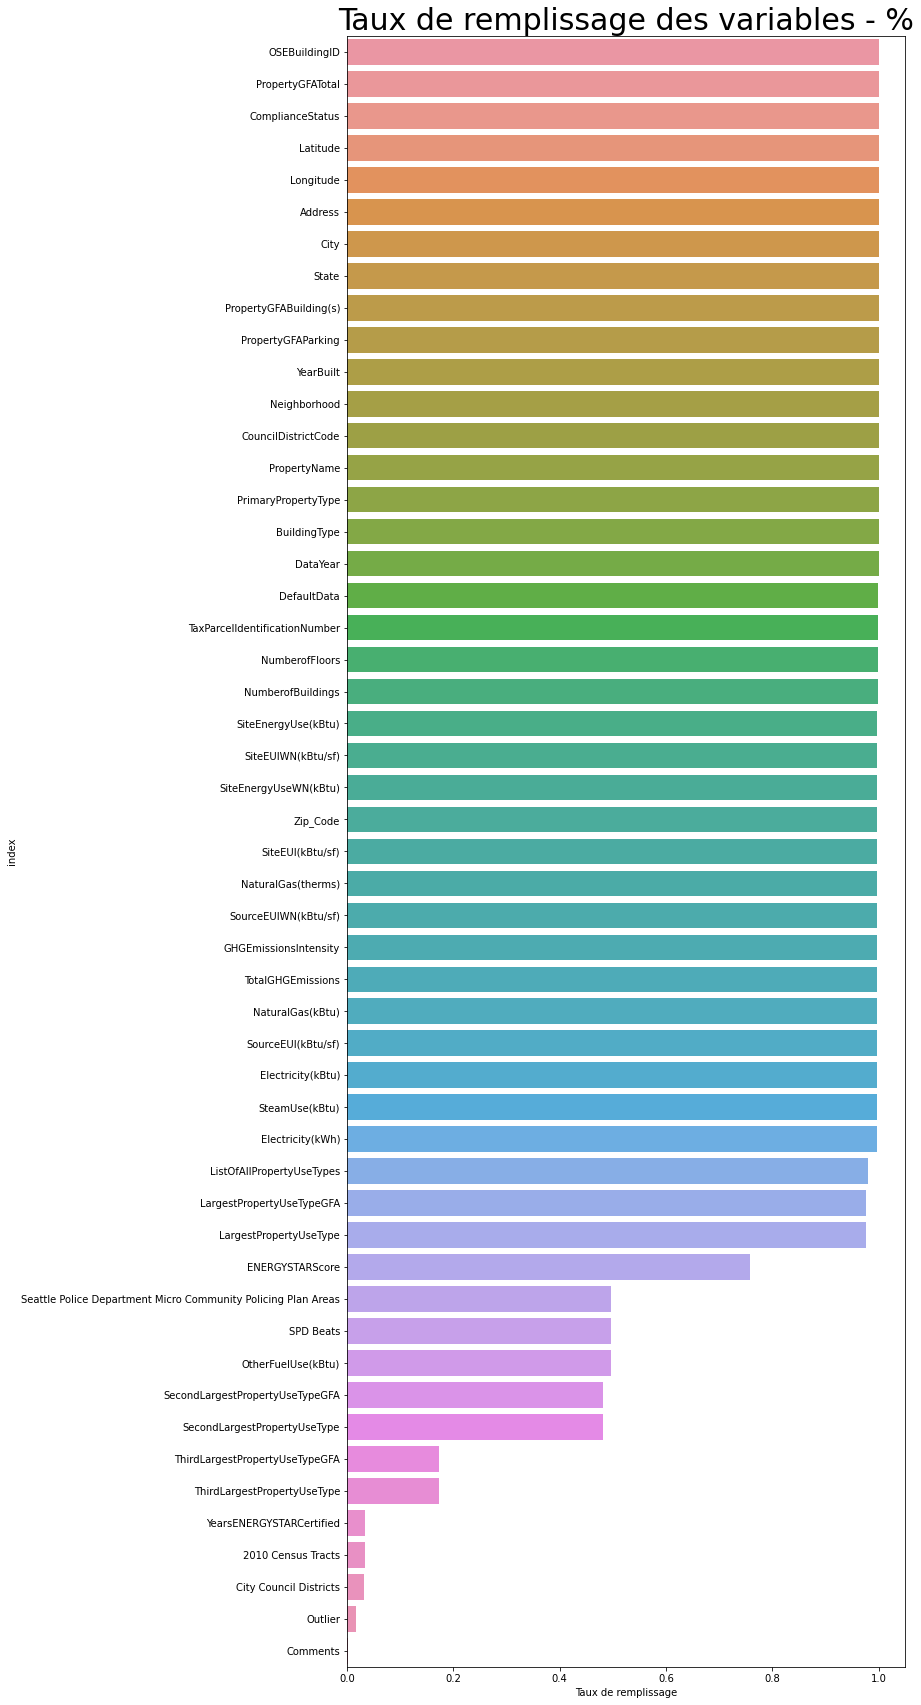

In [ ]:
graphe_remplissage_variable(concat_data_2015_2016)

On peut dire que la plupart des colonnes sont remplies convenablement.


### <font color='blue'>Réduction des dimensions pour correspondre au besoin du projet </font>

#### <font color='purple'> Restriction aux bâtiment non résidentiel + Suppression des lignes avec des erreur de remplissage</font>

Ce projet ne concerne que les bâtiment non résidentiels, il faut donc eliminer les lignes qui concernent les bâtiments résidentiels.

In [ ]:
def remove_rows(dataframe) :
  rows_to_keep = ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA']
  dataframe = dataframe.loc[dataframe['BuildingType'].isin(rows_to_keep)]   #on ne garde que les bâtiments non résidentiels
  return dataframe


In [ ]:
short_data = remove_rows(concat_data_2015_2016)

In [ ]:
short_data.shape

(3318, 51)

In [ ]:
short_data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [ ]:
short_data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',


In [ ]:
short_data.drop(short_data.loc[short_data['PrimaryPropertyType']=='Low rise Multifamily'].index, inplace=True)
short_data.drop(short_data.loc[short_data['LargestPropertyUseType']=='Multifamily Housing'].index, inplace=True)


In [ ]:
short_data.shape

(3295, 51)

Dans le jeu de données, il reste donc 3295 lignes pour 51 colonnes.

#### <font color='purple'> Restriction aux bâtiment avec l'ENERGYSTARScore renseigné </font>

Pour la suite de mes analyses et pour l'établissement des modèles futurs, je décide de ne garder que les bâtiments avec l'ENERGYSTARScore renseigné de façon a avoir uniquement des valeurs réelles ce qui me permettra d'avoir des résultats plus fiables à la sortie de mes modèles.

In [ ]:
short_data.dropna(subset=['ENERGYSTARScore'], inplace=True)
short_data.isna().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       0
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      3
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(s)                                              0
ListOfAllPropertyUse

In [ ]:
short_data.shape

(2204, 51)

Dans le jeu de données, il reste donc 2204 lignes pour 51 colonnes.

#### <font color='purple'> Élimination des colonnes non-pertinentes pour le projet </font>



 Colonnes que je décide de supprimer :
- OSEBuildingID, TaxParcelIdentificationNumber  car non utilisées
- City car il y a une seule valeur = pas intéressant
- State car il y a une seule valeur = pas intéressant
- ListOfAllPropertyUseTypes car données de cette colonne se retrouvent dans d'autres colonnes
- Colonnes non intéressantes : SPD Beats, ComplianceStatus, DefaultData, Address, Zip_Code, comments, 2010 Census Tracts, Seattle Police Department Micro Community Policing Plan Areas, City Council Districts

Le projet se concentre sur la quantité de CO2 émis et la quantité d'électricité utilisée. Certaines colonnes détaillant ces consommations peuvent être supprimées. On ne gardera que les colonnes montrant les quantités totales car le projet a pour objectif de se passer des relevés annuels.

Colonnes à supprimer :

SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), OtherFuelUse(kBtu), GHGEmissionsIntensity

In [ ]:
def remove_columns(dataframe) :
  new = pd.DataFrame()
  #colonnes = dataframe.columns.tolist()
  columns_to_keep = [ 'DataYear','PropertyName','BuildingType','YearBuilt','Neighborhood', 'Latitude','Longitude','PrimaryPropertyType','NumberofBuildings','NumberofFloors',
 'PropertyGFATotal','LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore','SiteEnergyUse(kBtu)','TotalGHGEmissions','Outlier']

  for column in columns_to_keep:
      try:
           new[column]=dataframe[column]
      except:
          print('...colonne non présente : ', column)
          print('\n')
  print("Toutes les colonnes présentes ont été gardées du jeu de données")
  return new

In [ ]:
df_short_data = remove_columns(short_data)

Toutes les colonnes présentes ont été gardées du jeu de données


In [ ]:
df_short_data

,DataYear,PropertyName,BuildingType,YearBuilt,Neighborhood,Latitude,Longitude,PrimaryPropertyType,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Outlier
0,2015,MAYFLOWER PARK HOTEL,NonResidential,1927,DOWNTOWN,47.612190,47.612190,Hotel,1.0,12.0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,65.0,6.981428e+06,249.43,NaN
1,2015,PARAMOUNT HOTEL,NonResidential,1996,DOWNTOWN,47.613106,47.613106,Hotel,1.0,11.0,103566,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,8.354235e+06,263.51,NaN
2,2015,WESTIN HOTEL,NonResidential,1969,DOWNTOWN,47.613349,47.613349,Hotel,1.0,41.0,961990,Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,7.313066e+07,2061.48,NaN
3,2015,HOTEL MAX,NonResidential,1926,DOWNTOWN,47.614216,47.614216,Hotel,1.0,10.0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,1.0,2.822932e+07,1936.34,High Outlier
4,2015,WARWICK SEATTLE HOTEL,NonResidential,1980,DOWNTOWN,47.613754,47.613754,Hotel,1.0,18.0,119890,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,1.482910e+07,507.70,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,2016,Airport - Main Terminal,NonResidential,1929,GREATER DUWAMISH,47.531610,-122.299440,Small- and Mid-Sized Office,1.0,2.0,24990,Office,24990.0,NaN,NaN,NaN,NaN,9.0,4.420650e+06,134.80,NaN
6687,2016,Hamlin Robinson School,NonResidential,2015,GREATER DUWAMISH,47.588310,-122.306500,K-12 School,1.0,3.0,45000,K-12 School,45728.0,Parking,0.0,NaN,NaN,77.0,1.325973e+06,9.24,NaN
6706,2016,Central West HQ / Brown Bear,Nonresidential COS,1952,MAGNOLIA / QUEEN ANNE,47.635720,-122.375250,Office,1.0,1.0,13661,Office,13661.0,NaN,NaN,NaN,NaN,75.0,5.026677e+05,3.50,NaN
6709,2016,Genesee/SC SE HQ,Nonresidential COS,1960,SOUTHEAST,47.564400,-122.278130,Office,1.0,1.0,15398,Office,15398.0,NaN,NaN,NaN,NaN,93.0,3.878100e+05,7.79,NaN


In [ ]:
df_short_data.shape

(2204, 21)

#### <font color='purple'> Suppression des colonnes qui ont un taux de données manquantes supérieures à une limite </font>

In [ ]:
df_short_data = filtration_colonnes(df_short_data, 0.50)

Nombre de colonnes avec un taux de remplissage supérieur à 50.00% : 16 colonnes.
Nombre de colonnes supprimées : 5 colonnes
 
 


Le taux de remplisage des colonnes choisi est de 50% de façon à avoir le plus de données réelles possibles ainsi que des variables utiles pour l'exploration.

In [ ]:
df_short_data.isna().sum()

DataYear                      0
PropertyName                  0
BuildingType                  0
YearBuilt                     0
Neighborhood                  0
Latitude                      0
Longitude                     0
PrimaryPropertyType           0
NumberofBuildings             0
NumberofFloors                3
PropertyGFATotal              0
LargestPropertyUseType       52
LargestPropertyUseTypeGFA    52
ENERGYSTARScore               0
SiteEnergyUse(kBtu)           0
TotalGHGEmissions             0
dtype: int64

Les colonnes supprimées sont :

- SecondLargestPropertyUseType
- SecondLargestPropertyUseTypeGFA
- ThirdLargestPropertyUseType
- ThirdLargestPropertyUseTypeGFA
- Outlier

Le jeu de données a donc 2204 lignes pour 16 colonnes.


#### <font color='purple'> Outliers </font>


In [ ]:
df_short_data.shape

(2204, 16)

Toutes les données ne suivent pas une distribution normale.
Une bonne statistique pour résumer un échantillon de données de distribution non gaussienne est la plage interquartile (IQR).
L'IQR est calculée comme la différence entre le 75e et le 25e percentile des données (Q3-Q1) et définit la boîte dans un graphique en boîte à moustaches. A partir de ces percentiles, une limite supérieure et une limite inférieure sont définies, les valeurs plus grandes ou plus petites à ces limites sont considérées comme outlier.

In [ ]:
import collections
from collections import Counter

"""Prend en paramètre un dataset et renvoie une liste des indices correspondant aux observations contenant plus de n valeurs aberrantes ainsi qu'un jeu de données sans donnée abhérante"""
def remove_IQR(df_in, n):
  indexes_outliers = [] 
  for col_name in df_in.select_dtypes(include = ['int64','float64']).columns.tolist(): #itération sur les colonnes contenant des valeurs numériques
    print('colonne ', col_name)
    Q1 = df_in[col_name].quantile(0.25) # 1st quartile (25%)
    Q3 = df_in[col_name].quantile(0.75) # 3rd quartile (75%)
    #print("le Q1 et Q3 sont : ")
    #print(Q1, Q3)
    IQR = Q3 - Q1 #  L'IQR peut ensuite être calculé comme la différence entre le 75e et le 25e percentile : Interquartile range (IQR)
    #print("le IQR est ")
    #print(IQR)
    lower_limit = Q1 - 1.5*IQR # outlier step : calculer le seuil pour les valeurs aberrantes comme 1,5 fois l'IQR et soustraire ce seuil du 25e percentile et l'ajouter au 75e percentile pour donner les limites réelles des données.
    upper_limit = Q3 + 1.5*IQR
    #print("la limite inférieure acceptée et la limite inférieure acceptée sont: ")
    lower_limit, upper_limit #utiliser ces limites pour identifier les valeurs aberrantes.
    list_outliers = df_in[(df_in[col_name]<lower_limit)|(df_in[col_name]>upper_limit)].index # Determine a list of indices of outliers for feature col
    indexes_outliers.extend(list_outliers) # append the found outlier indices for col to the list of outlier indices

  indexes_outliers = Counter(indexes_outliers)  #is a container that keeps track of how many times equivalent values are added
  multiple_outliers = list( k for k, v in indexes_outliers.items() if v > n )  # select observations containing more than n outliers
  print(" ")
  print("remove {} outliers" .format(len(multiple_outliers)))
  df_no_outlier1 = df_in.drop(multiple_outliers, axis = 0, inplace=False).reset_index(drop=True) 
  return df_no_outlier1


In [ ]:
df_short_data_clean = remove_IQR(df_short_data, 1)

colonne  DataYear
colonne  YearBuilt
colonne  Latitude
colonne  Longitude
colonne  NumberofBuildings
colonne  NumberofFloors
colonne  PropertyGFATotal
colonne  LargestPropertyUseTypeGFA
colonne  ENERGYSTARScore
colonne  SiteEnergyUse(kBtu)
colonne  TotalGHGEmissions
 
remove 270 outliers


In [ ]:
df_short_data_clean.describe()

,DataYear,YearBuilt,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
count,1934.000000,1934.000000,1934.000000,1934.000000,1934.00000,1932.000000,1934.000000,1888.000000,1934.000000,1.934000e+03,1934.000000
mean,2015.491210,1961.401241,47.615840,-35.864472,1.00000,3.138199,69220.625129,58512.237288,64.408997,3.654852e+06,73.235310
std,0.500052,31.701504,0.050966,84.983172,0.18478,3.977155,58088.920691,44371.905029,28.549260,3.902349e+06,86.700122
min,2015.000000,1900.000000,47.499170,-122.411820,0.00000,0.000000,12294.000000,8061.000000,1.000000,0.000000e+00,-0.800000
25%,2015.000000,1931.000000,47.579539,-122.332610,1.00000,1.000000,29754.000000,26418.250000,47.000000,1.164803e+06,17.000000
50%,2015.000000,1965.000000,47.612891,47.519569,1.00000,2.000000,47560.000000,43122.000000,72.000000,2.155899e+06,40.795000
75%,2016.000000,1987.000000,47.655038,47.613533,1.00000,4.000000,87178.000000,72859.000000,88.000000,4.912426e+06,88.537500
max,2016.000000,2015.000000,47.733870,47.733811,5.00000,99.000000,446261.000000,325424.000000,100.000000,4.168064e+07,691.260000


In [ ]:
df_short_data_clean.shape

(1934, 16)

In [ ]:
df_short_data_clean.isna().sum()

DataYear                      0
PropertyName                  0
BuildingType                  0
YearBuilt                     0
Neighborhood                  0
Latitude                      0
Longitude                     0
PrimaryPropertyType           0
NumberofBuildings             0
NumberofFloors                2
PropertyGFATotal              0
LargestPropertyUseType       46
LargestPropertyUseTypeGFA    46
ENERGYSTARScore               0
SiteEnergyUse(kBtu)           0
TotalGHGEmissions             0
dtype: int64

272 lignes ont été supprimées car chaque ligne contenait au moins une valeur aberrante. Mon jeu de données a donc désormais 1939 lignes pour 16 colonnes.

#### <font color='purple'> Imputation des données manquantes </font>


Il me reste des données manquantes, je décide donc de les imputer. Pour la variable LargestPropertyUseType, je décide de remplacer les valeurs manquantes par le contenu de la colonne PrimaryPropertyType pour une même ligne car l'information est semblable. Je décide d'imputer les variables LargestPropertyUseTypeGFA et NumberofFloors par la moyenne de chacune d'elle.

In [ ]:
df_short_data_clean['LargestPropertyUseType']=df_short_data_clean['LargestPropertyUseType'].mask(pd.isnull, df_short_data_clean['PrimaryPropertyType'])
df_short_data_clean['LargestPropertyUseTypeGFA']=df_short_data_clean['LargestPropertyUseTypeGFA'].mask(pd.isnull, np.mean(df_short_data_clean['LargestPropertyUseTypeGFA']))
df_short_data_clean['NumberofFloors']=df_short_data_clean['NumberofFloors'].mask(pd.isnull, int(np.mean(df_short_data_clean['NumberofFloors'])))

In [ ]:
df_short_data_clean.isna().sum()

DataYear                     0
PropertyName                 0
BuildingType                 0
YearBuilt                    0
Neighborhood                 0
Latitude                     0
Longitude                    0
PrimaryPropertyType          0
NumberofBuildings            0
NumberofFloors               0
PropertyGFATotal             0
LargestPropertyUseType       0
LargestPropertyUseTypeGFA    0
ENERGYSTARScore              0
SiteEnergyUse(kBtu)          0
TotalGHGEmissions            0
dtype: int64

#### <font color='purple'> Typage de variable </font>

Vérification et modification des types de variable si besoin.

In [ ]:
df_short_data_clean.head()

,DataYear,PropertyName,BuildingType,YearBuilt,Neighborhood,Latitude,Longitude,PrimaryPropertyType,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,2015,MAYFLOWER PARK HOTEL,NonResidential,1927,DOWNTOWN,47.612190,47.612190,Hotel,1.0,12.0,88434,Hotel,88434.000000,65.0,6981428.0,249.43
1,2015,PARAMOUNT HOTEL,NonResidential,1996,DOWNTOWN,47.613106,47.613106,Hotel,1.0,11.0,103566,Hotel,83880.000000,51.0,8354235.0,263.51
2,2015,CAMLIN WORLDMARK HOTEL,NonResidential,1926,DOWNTOWN,47.614114,47.614114,Hotel,1.0,11.0,83008,Hotel,81352.000000,25.0,6252842.0,208.46
3,2015,HOTEL MONACO,NonResidential,1969,DOWNTOWN,47.607121,47.607121,Hotel,1.0,11.0,153163,Hotel,58512.237288,48.0,14719853.0,576.63
4,2015,EXECUTIVE PACIFIC PLAZA,NonResidential,1928,DOWNTOWN,47.607099,47.607099,Hotel,1.0,9.0,65009,Hotel,65009.000000,39.0,6807227.0,334.87


In [ ]:
def upper(dataframe) :
  dataframe['PropertyName'] = dataframe['PropertyName'].str.upper()
  dataframe['Neighborhood'] = dataframe['Neighborhood'].str.upper()
  return dataframe

In [ ]:
df_short_data_clean = upper(df_short_data_clean)

In [ ]:
df_short_data_clean.dtypes

DataYear                       int64
PropertyName                  object
BuildingType                  object
YearBuilt                      int64
Neighborhood                  object
Latitude                     float64
Longitude                    float64
PrimaryPropertyType           object
NumberofBuildings            float64
NumberofFloors               float64
PropertyGFATotal               int64
LargestPropertyUseType        object
LargestPropertyUseTypeGFA    float64
ENERGYSTARScore              float64
SiteEnergyUse(kBtu)          float64
TotalGHGEmissions            float64
dtype: object

In [ ]:
for col in ['DataYear', 'BuildingType', 'YearBuilt', 'Neighborhood', 'PrimaryPropertyType', 'Neighborhood' ]:
    df_short_data_clean[col] = df_short_data_clean[col].astype('category')

for col in ['NumberofBuildings', 'NumberofFloors']:
    df_short_data_clean[col] = df_short_data_clean[col].astype('int64')

df_short_data_clean['PropertyGFATotal'] = df_short_data_clean['PropertyGFATotal'].astype('float64')


In [ ]:
df_short_data_clean.dtypes

DataYear                     category
PropertyName                   object
BuildingType                 category
YearBuilt                    category
Neighborhood                 category
Latitude                      float64
Longitude                     float64
PrimaryPropertyType          category
NumberofBuildings               int64
NumberofFloors                  int64
PropertyGFATotal              float64
LargestPropertyUseType         object
LargestPropertyUseTypeGFA     float64
ENERGYSTARScore               float64
SiteEnergyUse(kBtu)           float64
TotalGHGEmissions             float64
dtype: object

#### <font color='purple'> Données Manquantes </font>

##### <font color='olive'> **Répartition**</font>

In [ ]:
df_short_data_clean.isna().sum()

DataYear                     0
PropertyName                 0
BuildingType                 0
YearBuilt                    0
Neighborhood                 0
Latitude                     0
Longitude                    0
PrimaryPropertyType          0
NumberofBuildings            0
NumberofFloors               0
PropertyGFATotal             0
LargestPropertyUseType       0
LargestPropertyUseTypeGFA    0
ENERGYSTARScore              0
SiteEnergyUse(kBtu)          0
TotalGHGEmissions            0
dtype: int64

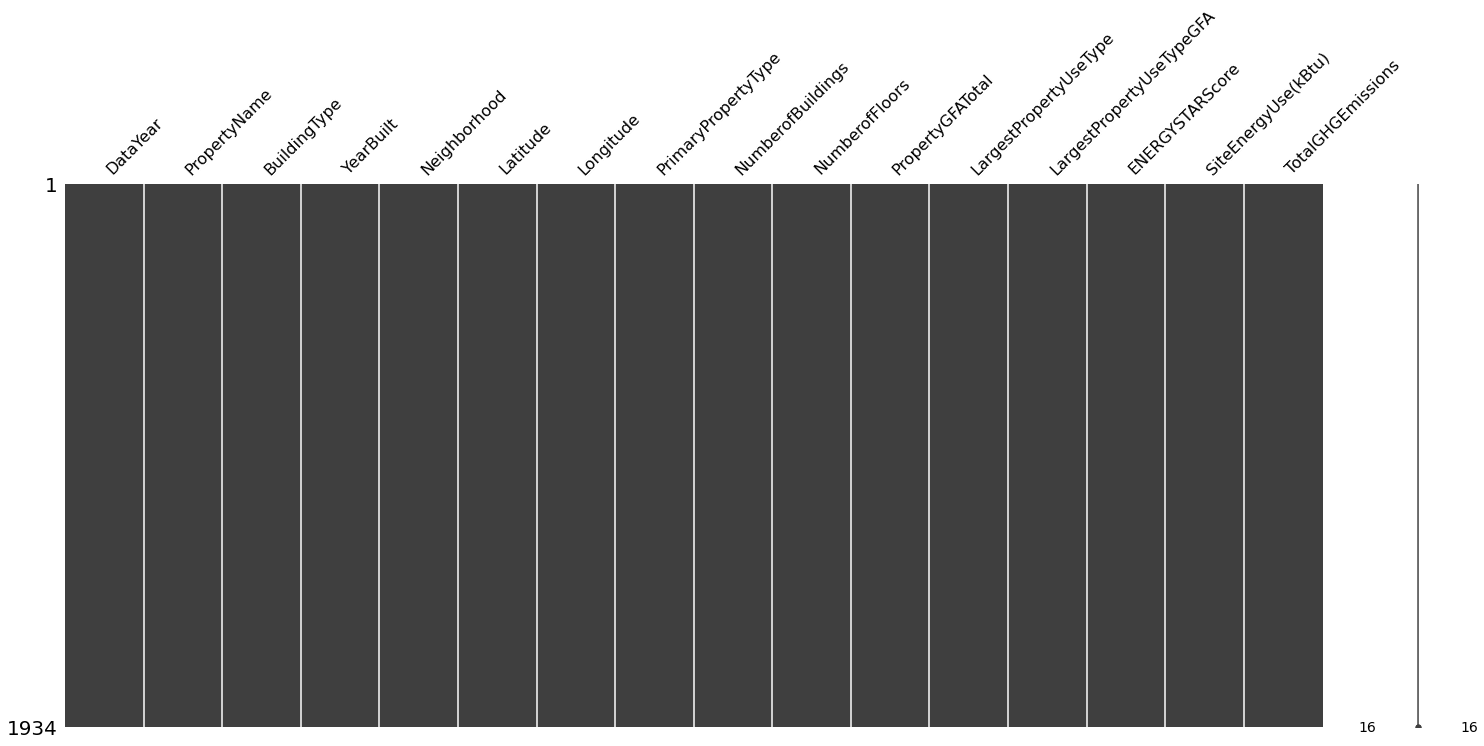

In [ ]:
msno.matrix(df_short_data_clean)

Il n'y a plus de donnée manquante dans le jeu de données.

##### <font color='olive'> ***Taux***</font>

Le jeux de données est rempli à 100.00%
et il a 0.00% de données manquantes
 
 


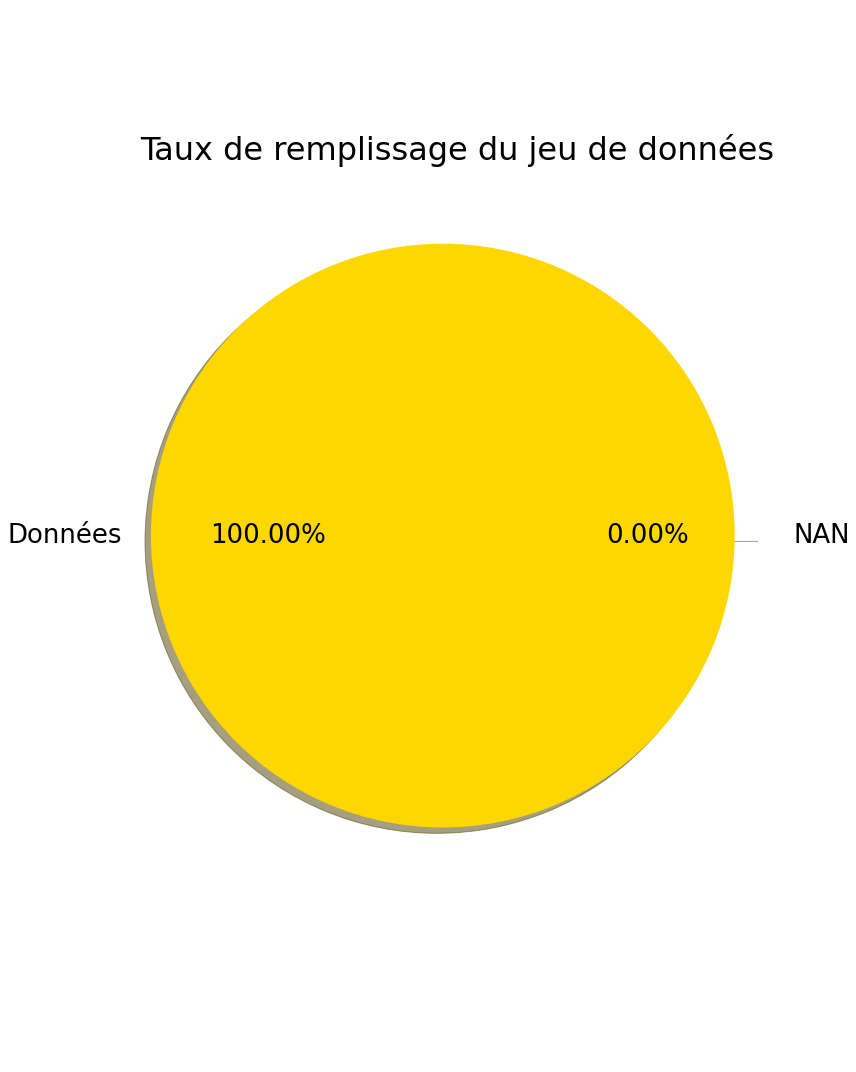

In [ ]:
pie_NaN(df_short_data_clean)

Il n'y a plus de donnée manquante dans le jeu de données.

### <font color='blue'>Export du CSV final </font>


In [ ]:
#sur google colab
from google.colab import drive
drive.mount('/content/drive/')
df_short_data_clean.to_csv('df_CO2_elec.csv', index=False)
!cp df_CO2_elec.csv /content/drive/My\ Drive/ 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#csv_final_impute_cleaned.to_csv('Data/csv_final_impute_cleaned.csv', index=False)

In [ ]:
df_CO2_elec = df_short_data_clean.copy()

## <font color='green'>Analyse Univariées : Variables numériques</font>


#### <font color='blue'> Histogramme </font>

In [ ]:
def plot_multiple_histograms(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,15))
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(df[col], kde=True, ax=axs)
            else:
                sns.distplot(df[col], kde=True, ax=axs[j])
        else:
            sns.distplot(df[col], kde=True, ax=axs[i, j]) 

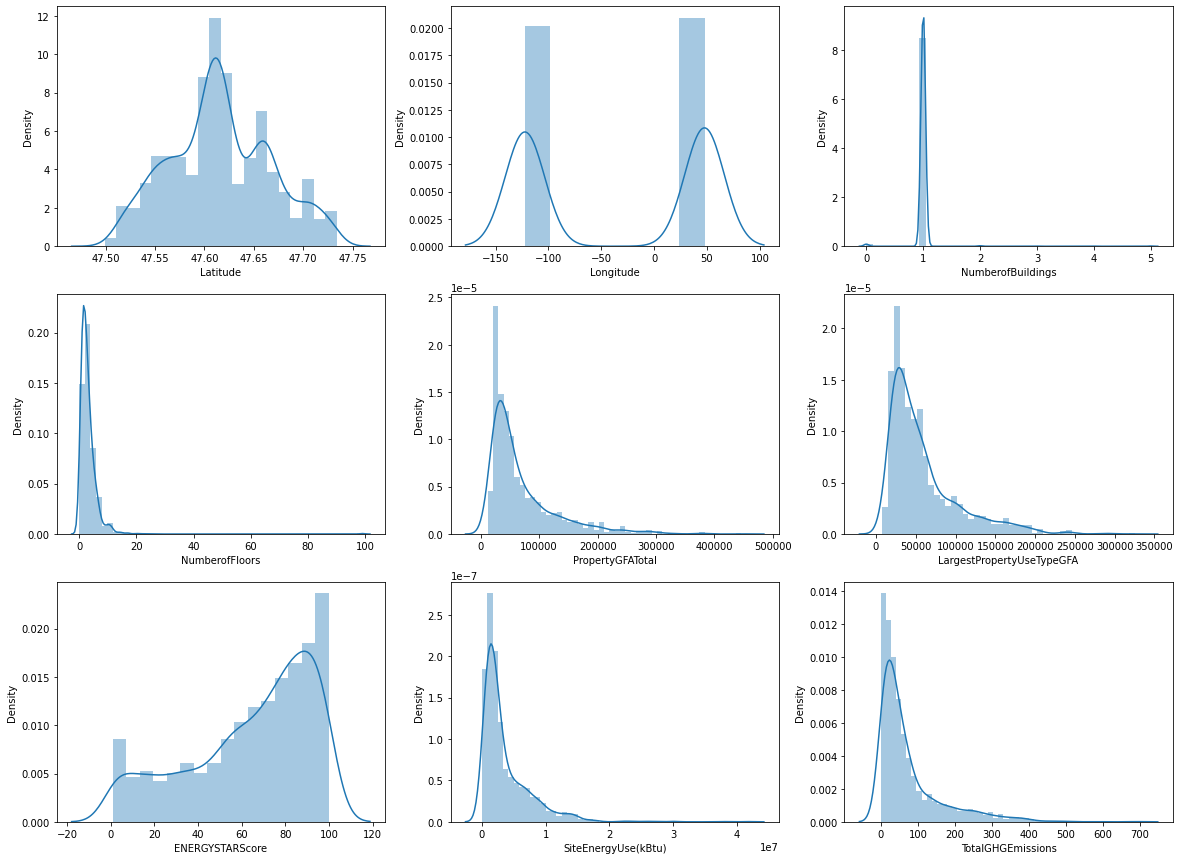

In [ ]:
 plot_multiple_histograms(df_CO2_elec, df_CO2_elec.select_dtypes(include = ['int64','float64']).columns.tolist())

De nombreuses variables sont asymétriques et ne sont pas proches d'une loi normale. Pour les modèles de prédiction, il sera nécessaire de standardiser ces variables (normalisation, log etc ... )

#### <font color='blue'> Mesure statistique et boxplots </font>

In [ ]:
df_numeric = df_CO2_elec.select_dtypes(include = 'number')

In [ ]:
df_numeric.describe()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
count,1934.000000,1934.000000,1934.00000,1934.000000,1934.000000,1934.000000,1934.000000,1.934000e+03,1934.000000
mean,47.615840,-35.864472,1.00000,3.138056,69220.625129,58512.237288,64.408997,3.654852e+06,73.235310
std,0.050966,84.983172,0.18478,3.975100,58088.920691,43840.762383,28.549260,3.902349e+06,86.700122
min,47.499170,-122.411820,0.00000,0.000000,12294.000000,8061.000000,1.000000,0.000000e+00,-0.800000
25%,47.579539,-122.332610,1.00000,1.000000,29754.000000,26670.000000,47.000000,1.164803e+06,17.000000
50%,47.612891,47.519569,1.00000,2.000000,47560.000000,44300.000000,72.000000,2.155899e+06,40.795000
75%,47.655038,47.613533,1.00000,4.000000,87178.000000,71717.000000,88.000000,4.912426e+06,88.537500
max,47.733870,47.733811,5.00000,99.000000,446261.000000,325424.000000,100.000000,4.168064e+07,691.260000


In [ ]:
from scipy.stats import variation

def description_var(df):
  for col in df :
    colData=df[col]
    moyenne=np.mean(colData)
    mediane = np.median(colData)
    Q1 = np.percentile(colData, 25)
    Q3 = np.percentile(colData, 75)
    max = colData.max()
    min = colData.min()
    variance = np.var(colData)
    ecartType = np.std(colData)
    skew=pd.DataFrame(colData).skew()[0]
    kurt=pd.DataFrame(colData).kurtosis()[0]

    print("Mesures statistiques pour la variable {}" .format(col))
    print(" ")
    print("La moyenne de la variable {} est : {} ".format(col,round(moyenne, 2)))
    print("La mediane de la variable {} est : {} ".format(col,round(mediane, 2)))
    print("Quartile Q1 vaut : {} ".format(round(Q1, 2)))
    print("Quartile Q3 vaut : {} ".format(round(Q3, 2)))
    print("Le maximum vaut : {} ".format(max))
    print("Le minimum vaut : {} ".format(min))
    print(" ")
    print(" ")
    print("Mesures de dispersion pour la variable {}" .format(col))
    print(" ")
    print("La variance de la variable {} est : {} " .format(col,round(variance, 2)))
    print("L'écart type de la variable {} est : {} " .format(col,round(ecartType, 2)))
    print("Le coefficient de variation de la variable {} est de : {}" .format(col,round(variation(colData),2))) 
    print("L'écart interquartile de la variable {} est de : {} " .format(col,round(Q3-Q1, 2)))
    print(" ")
    print(" ")
    print("Mesures de forme pour la variable {}" .format(col))
    print(" ")
    print("Le skewewness empirique pour la variable {} est de {} " .format(col,round(skew, 4)))
    if (skew==0):
      print("La distribution de la variable {} est symétrique." .format(col))
    elif (skew>0):
      print("La distribution de la variable {} est étalée vers la droite." .format(col))
    else:
      print("La distribution de la variable {} est étalée vers la gauche." .format(col))
    print(" ")
    print("Le Kurtosis empirique pour la variable {} est de {} " .format(col, round(kurt, 4)))
    if kurt==0:
      print("La distribution de la variable {} a le même applatissement que la distribution normale." .format(col))
    elif kurt>0:
      print("La distribution de la variable {} est moins applatie que la distribution normale, les observations sont plus concentrées." .format(col))
    else:
      print("La distribution de la variable {} est plus applatie que la distribution normale, les observations sont moins concentrées." .format(col))
    print(" ")
    plt.figure(figsize=(10,8))
    df[col].hist(color = 'pink', edgecolor = 'red', log = True, )
    plt.title("Représentation statistique de la variable {}".format(col))
    plt.show()
    print(" ")
    print("Boxplot pour la variable {}".format(col))
    plt.figure(figsize=(6,6))
    df.boxplot(column=[col], return_type='axes', vert=True, showfliers=False, showcaps=True, patch_artist=True, color='tan', medianprops={'linestyle': '-', 'linewidth': 2, 'color': 'red'}, whiskerprops={'linestyle': '-', 'linewidth': 2, 'color' : 'blue'}, capprops={'linestyle': '-', 'linewidth': 2, 'color':'blue'})
    plt.show()
    print(" ")
    print(" ")


Mesures statistiques pour la variable Latitude
 
La moyenne de la variable Latitude est : 47.62 
La mediane de la variable Latitude est : 47.61 
Quartile Q1 vaut : 47.58 
Quartile Q3 vaut : 47.66 
Le maximum vaut : 47.73387 
Le minimum vaut : 47.49917 
 
 
Mesures de dispersion pour la variable Latitude
 
La variance de la variable Latitude est : 0.0 
L'écart type de la variable Latitude est : 0.05 
Le coefficient de variation de la variable Latitude est de : 0.0
L'écart interquartile de la variable Latitude est de : 0.08 
 
 
Mesures de forme pour la variable Latitude
 
Le skewewness empirique pour la variable Latitude est de 0.1473 
La distribution de la variable Latitude est étalée vers la droite.
 
Le Kurtosis empirique pour la variable Latitude est de -0.5051 
La distribution de la variable Latitude est plus applatie que la distribution normale, les observations sont moins concentrées.
 


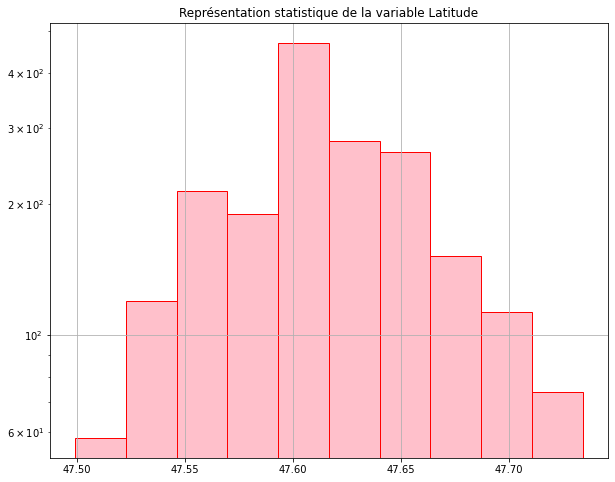

 
Boxplot pour la variable Latitude


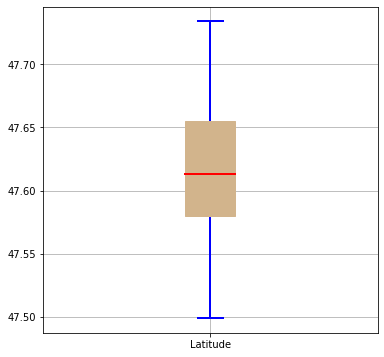

 
 
Mesures statistiques pour la variable NumberofBuildings
 
La moyenne de la variable NumberofBuildings est : 1.0 
La mediane de la variable NumberofBuildings est : 1.0 
Quartile Q1 vaut : 1.0 
Quartile Q3 vaut : 1.0 
Le maximum vaut : 5 
Le minimum vaut : 0 
 
 
Mesures de dispersion pour la variable NumberofBuildings
 
La variance de la variable NumberofBuildings est : 0.03 
L'écart type de la variable NumberofBuildings est : 0.18 
Le coefficient de variation de la variable NumberofBuildings est de : 0.18
L'écart interquartile de la variable NumberofBuildings est de : 0.0 
 
 
Mesures de forme pour la variable NumberofBuildings
 
Le skewewness empirique pour la variable NumberofBuildings est de 12.3123 
La distribution de la variable NumberofBuildings est étalée vers la droite.
 
Le Kurtosis empirique pour la variable NumberofBuildings est de 277.4306 
La distribution de la variable NumberofBuildings est moins applatie que la distribution normale, les observations sont plus concent

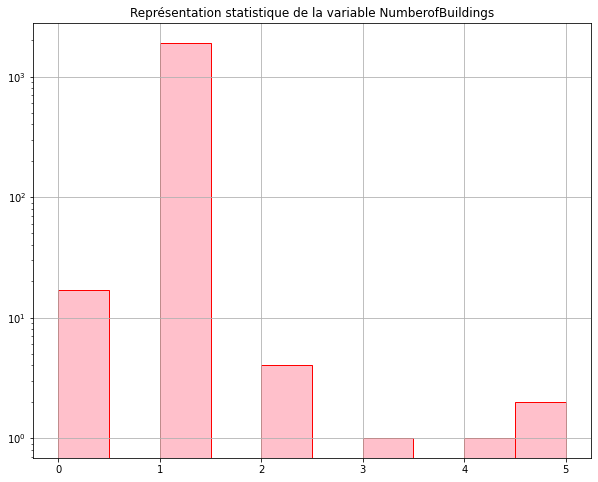

 
Boxplot pour la variable NumberofBuildings


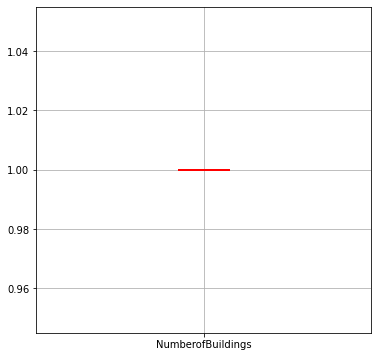

 
 
Mesures statistiques pour la variable NumberofFloors
 
La moyenne de la variable NumberofFloors est : 3.14 
La mediane de la variable NumberofFloors est : 2.0 
Quartile Q1 vaut : 1.0 
Quartile Q3 vaut : 4.0 
Le maximum vaut : 99 
Le minimum vaut : 0 
 
 
Mesures de dispersion pour la variable NumberofFloors
 
La variance de la variable NumberofFloors est : 15.79 
L'écart type de la variable NumberofFloors est : 3.97 
Le coefficient de variation de la variable NumberofFloors est de : 1.27
L'écart interquartile de la variable NumberofFloors est de : 3.0 
 
 
Mesures de forme pour la variable NumberofFloors
 
Le skewewness empirique pour la variable NumberofFloors est de 15.1335 
La distribution de la variable NumberofFloors est étalée vers la droite.
 
Le Kurtosis empirique pour la variable NumberofFloors est de 350.068 
La distribution de la variable NumberofFloors est moins applatie que la distribution normale, les observations sont plus concentrées.
 


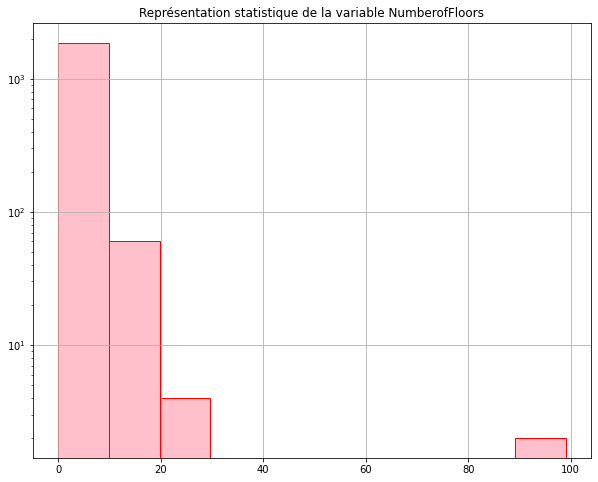

 
Boxplot pour la variable NumberofFloors


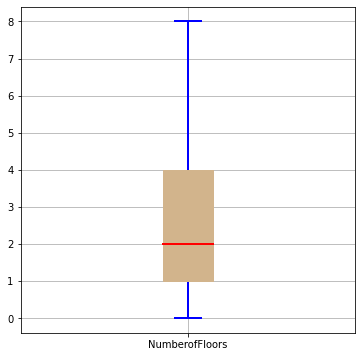

 
 
Mesures statistiques pour la variable PropertyGFATotal
 
La moyenne de la variable PropertyGFATotal est : 69220.63 
La mediane de la variable PropertyGFATotal est : 47560.0 
Quartile Q1 vaut : 29754.0 
Quartile Q3 vaut : 87178.0 
Le maximum vaut : 446261.0 
Le minimum vaut : 12294.0 
 
 
Mesures de dispersion pour la variable PropertyGFATotal
 
La variance de la variable PropertyGFATotal est : 3372577969.29 
L'écart type de la variable PropertyGFATotal est : 58073.9 
Le coefficient de variation de la variable PropertyGFATotal est de : 0.84
L'écart interquartile de la variable PropertyGFATotal est de : 57424.0 
 
 
Mesures de forme pour la variable PropertyGFATotal
 
Le skewewness empirique pour la variable PropertyGFATotal est de 2.0703 
La distribution de la variable PropertyGFATotal est étalée vers la droite.
 
Le Kurtosis empirique pour la variable PropertyGFATotal est de 5.0607 
La distribution de la variable PropertyGFATotal est moins applatie que la distribution normale, les 

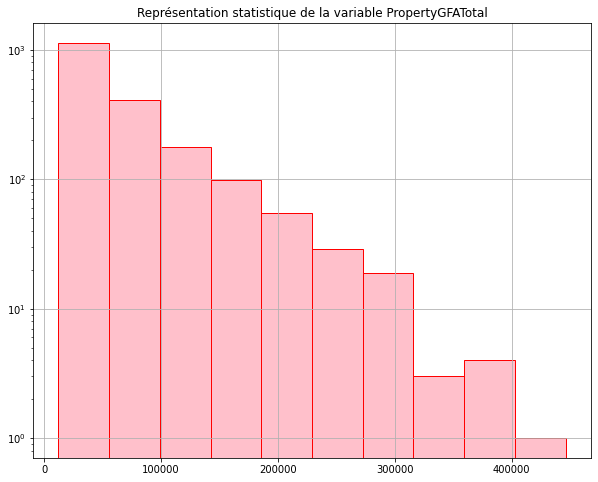

 
Boxplot pour la variable PropertyGFATotal


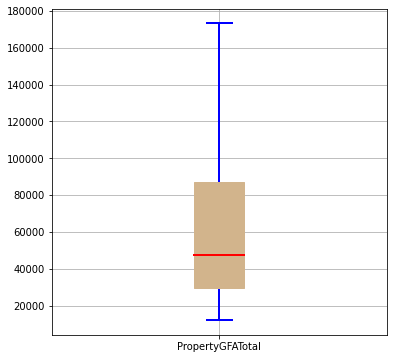

 
 
Mesures statistiques pour la variable LargestPropertyUseTypeGFA
 
La moyenne de la variable LargestPropertyUseTypeGFA est : 58512.24 
La mediane de la variable LargestPropertyUseTypeGFA est : 44300.0 
Quartile Q1 vaut : 26670.0 
Quartile Q3 vaut : 71717.0 
Le maximum vaut : 325424.0 
Le minimum vaut : 8061.0 
 
 
Mesures de dispersion pour la variable LargestPropertyUseTypeGFA
 
La variance de la variable LargestPropertyUseTypeGFA est : 1921018644.69 
L'écart type de la variable LargestPropertyUseTypeGFA est : 43829.43 
Le coefficient de variation de la variable LargestPropertyUseTypeGFA est de : 0.75
L'écart interquartile de la variable LargestPropertyUseTypeGFA est de : 45047.0 
 
 
Mesures de forme pour la variable LargestPropertyUseTypeGFA
 
Le skewewness empirique pour la variable LargestPropertyUseTypeGFA est de 1.8028 
La distribution de la variable LargestPropertyUseTypeGFA est étalée vers la droite.
 
Le Kurtosis empirique pour la variable LargestPropertyUseTypeGFA est de 

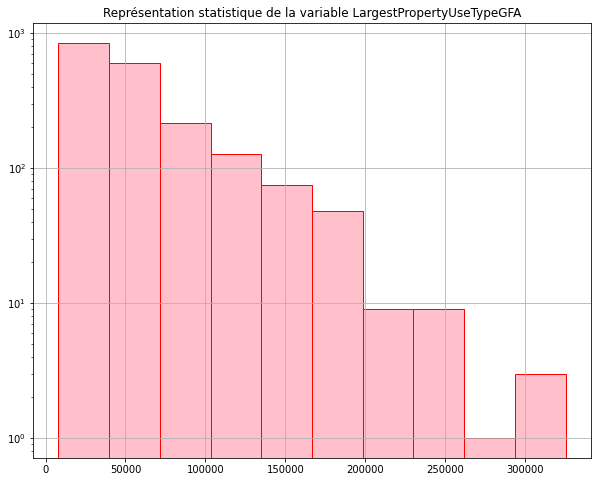

 
Boxplot pour la variable LargestPropertyUseTypeGFA


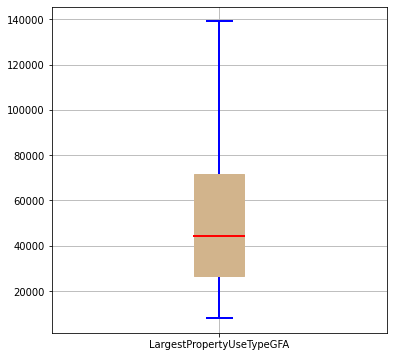

 
 
Mesures statistiques pour la variable ENERGYSTARScore
 
La moyenne de la variable ENERGYSTARScore est : 64.41 
La mediane de la variable ENERGYSTARScore est : 72.0 
Quartile Q1 vaut : 47.0 
Quartile Q3 vaut : 88.0 
Le maximum vaut : 100.0 
Le minimum vaut : 1.0 
 
 
Mesures de dispersion pour la variable ENERGYSTARScore
 
La variance de la variable ENERGYSTARScore est : 814.64 
L'écart type de la variable ENERGYSTARScore est : 28.54 
Le coefficient de variation de la variable ENERGYSTARScore est de : 0.44
L'écart interquartile de la variable ENERGYSTARScore est de : 41.0 
 
 
Mesures de forme pour la variable ENERGYSTARScore
 
Le skewewness empirique pour la variable ENERGYSTARScore est de -0.7348 
La distribution de la variable ENERGYSTARScore est étalée vers la gauche.
 
Le Kurtosis empirique pour la variable ENERGYSTARScore est de -0.575 
La distribution de la variable ENERGYSTARScore est plus applatie que la distribution normale, les observations sont moins concentrées.
 


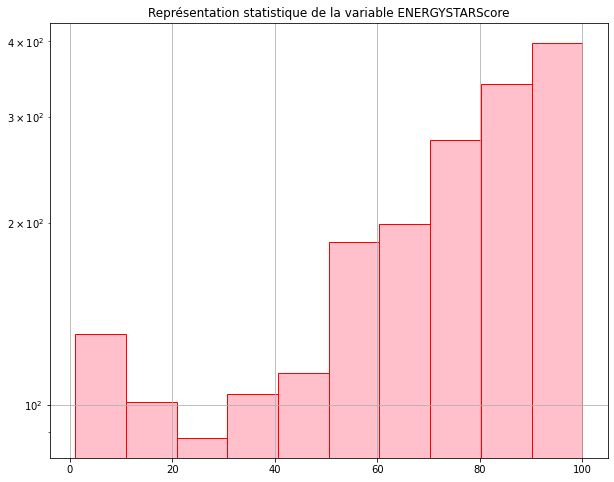

 
Boxplot pour la variable ENERGYSTARScore


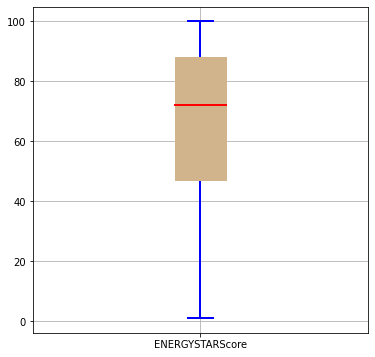

 
 
Mesures statistiques pour la variable SiteEnergyUse(kBtu)
 
La moyenne de la variable SiteEnergyUse(kBtu) est : 3654852.21 
La mediane de la variable SiteEnergyUse(kBtu) est : 2155898.62 
Quartile Q1 vaut : 1164803.03 
Quartile Q3 vaut : 4912425.75 
Le maximum vaut : 41680640.0 
Le minimum vaut : 0.0 
 
 
Mesures de dispersion pour la variable SiteEnergyUse(kBtu)
 
La variance de la variable SiteEnergyUse(kBtu) est : 15220455565762.69 
L'écart type de la variable SiteEnergyUse(kBtu) est : 3901340.23 
Le coefficient de variation de la variable SiteEnergyUse(kBtu) est de : 1.07
L'écart interquartile de la variable SiteEnergyUse(kBtu) est de : 3747622.72 
 
 
Mesures de forme pour la variable SiteEnergyUse(kBtu)
 
Le skewewness empirique pour la variable SiteEnergyUse(kBtu) est de 2.6993 
La distribution de la variable SiteEnergyUse(kBtu) est étalée vers la droite.
 
Le Kurtosis empirique pour la variable SiteEnergyUse(kBtu) est de 12.8161 
La distribution de la variable SiteEnergyUse

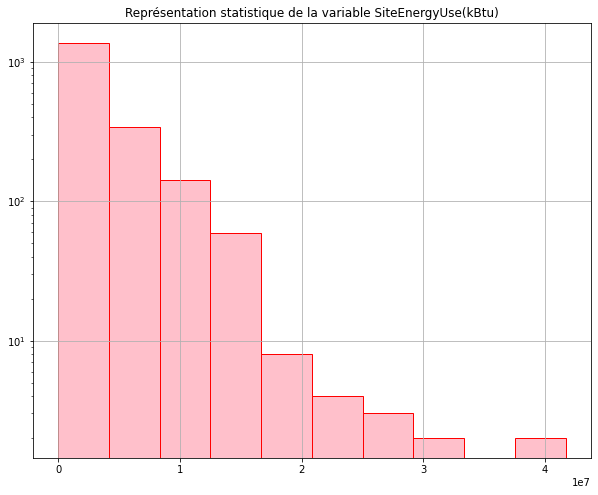

 
Boxplot pour la variable SiteEnergyUse(kBtu)


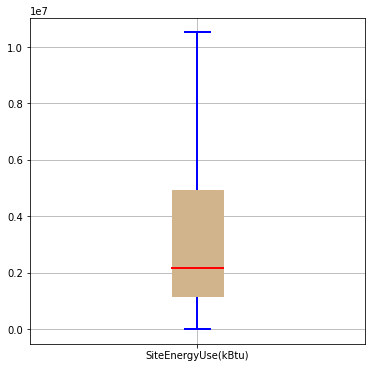

 
 
Mesures statistiques pour la variable TotalGHGEmissions
 
La moyenne de la variable TotalGHGEmissions est : 73.24 
La mediane de la variable TotalGHGEmissions est : 40.8 
Quartile Q1 vaut : 17.0 
Quartile Q3 vaut : 88.54 
Le maximum vaut : 691.26 
Le minimum vaut : -0.8 
 
 
Mesures de dispersion pour la variable TotalGHGEmissions
 
La variance de la variable TotalGHGEmissions est : 7513.02 
L'écart type de la variable TotalGHGEmissions est : 86.68 
Le coefficient de variation de la variable TotalGHGEmissions est de : 1.18
L'écart interquartile de la variable TotalGHGEmissions est de : 71.54 
 
 
Mesures de forme pour la variable TotalGHGEmissions
 
Le skewewness empirique pour la variable TotalGHGEmissions est de 2.1299 
La distribution de la variable TotalGHGEmissions est étalée vers la droite.
 
Le Kurtosis empirique pour la variable TotalGHGEmissions est de 5.2087 
La distribution de la variable TotalGHGEmissions est moins applatie que la distribution normale, les observations 

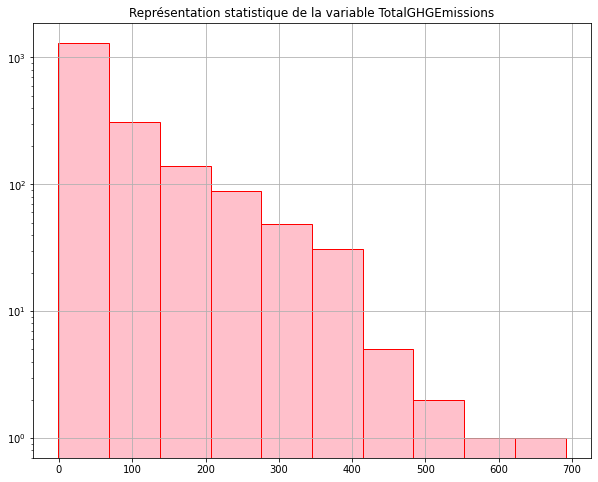

 
Boxplot pour la variable TotalGHGEmissions


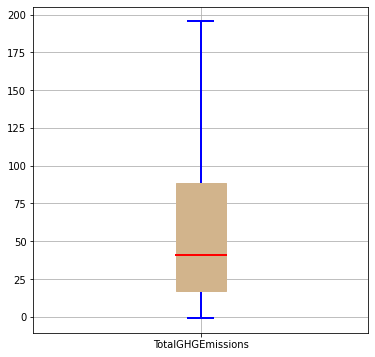

In [ ]:
description_var(df_numeric.loc[:, df_numeric.columns != 'Longitude'])

## <font color='green'>Analyse Univariée : Variables Nominales</font>

### <font color='blue'>Préparation </font>

In [ ]:
df_non_numeric = df_CO2_elec.select_dtypes(exclude='number')
df_non_numeric

,DataYear,PropertyName,BuildingType,YearBuilt,Neighborhood,PrimaryPropertyType,LargestPropertyUseType
0,2015,MAYFLOWER PARK HOTEL,NonResidential,1927,DOWNTOWN,Hotel,Hotel
1,2015,PARAMOUNT HOTEL,NonResidential,1996,DOWNTOWN,Hotel,Hotel
2,2015,CAMLIN WORLDMARK HOTEL,NonResidential,1926,DOWNTOWN,Hotel,Hotel
3,2015,HOTEL MONACO,NonResidential,1969,DOWNTOWN,Hotel,Hotel
4,2015,EXECUTIVE PACIFIC PLAZA,NonResidential,1928,DOWNTOWN,Hotel,Hotel
...,...,...,...,...,...,...,...
1929,2016,AIRPORT - MAIN TERMINAL,NonResidential,1929,GREATER DUWAMISH,Small- and Mid-Sized Office,Office
1930,2016,HAMLIN ROBINSON SCHOOL,NonResidential,2015,GREATER DUWAMISH,K-12 School,K-12 School
1931,2016,CENTRAL WEST HQ / BROWN BEAR,Nonresidential COS,1952,MAGNOLIA / QUEEN ANNE,Office,Office
1932,2016,GENESEE/SC SE HQ,Nonresidential COS,1960,SOUTHEAST,Office,Office


In [ ]:
df_non_numeric.columns

Index(['DataYear', 'PropertyName', 'BuildingType', 'YearBuilt', 'Neighborhood',
       'PrimaryPropertyType', 'LargestPropertyUseType'],
      dtype='object')

In [ ]:
df_non_numeric.dtypes

DataYear                  category
PropertyName                object
BuildingType              category
YearBuilt                 category
Neighborhood              category
PrimaryPropertyType       category
LargestPropertyUseType      object
dtype: object

### <font color='blue'>Type Objet : Nuages de mots et occurence</font>

In [ ]:
#import library
#!pip install wordcloud


In [ ]:
#Fonction to make a word cloud from a dataframe
def show_wordcloud(dataframe, title = None):
  from wordcloud import WordCloud, STOPWORDS
  wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=5 # chosen at random by flipping a coin; it was heads
    ).generate(str(dataframe))

  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  if title: 
      fig.suptitle(title, fontsize=20)
      fig.subplots_adjust(top=2.3)
  plt.imshow(wordcloud)
  plt.show()

In [ ]:
def graphe_objet(dataframe):
  from wordcloud import WordCloud, STOPWORDS
  object_df = dataframe.select_dtypes(include = ['object'])
  columns_object_df = list(object_df) 
  for col in columns_object_df :
    if col=='PropertyName':
      show_wordcloud(dataframe[col], "WordCloud de la variable {}" .format(col))
      print(" ")
      print(" ")
      print(" ")
      print(" ")
      print(" ")
      print(" ")    
      print(" ")
      print(" ")
      print(" ")
      print(" ")  
    else:

      counts = dataframe[col].value_counts()
      counts.index = counts.index.map(str)
      wordcloud = WordCloud(
          background_color='white',
          stopwords=STOPWORDS,
          max_words=200,
          max_font_size=40, 
          scale=3,
          random_state=5 # chosen at random by flipping a coin; it was heads
      ).generate_from_frequencies(counts)
          
      fig = plt.figure(1, figsize=(12, 12))
      plt.axis('off')
      fig.suptitle("WordCloud de la variable {}" .format(col), fontsize=20)
      fig.subplots_adjust(top=2.3)

      plt.imshow(wordcloud)
      plt.show()
      print(" ")
      print(" ")
      count  = dataframe[col].value_counts()
      count = count[:20,]
      plt.figure(figsize=(15,10))
      #sns.set(font_scale=2.5)
      sns.set(style="whitegrid")
      sns.barplot(count.values, count.index, alpha=0.8, orient = 'h')
      plt.title("Top 20 du nombre d\'occurence pour la variable {}" .format(col))
      plt.xlabel('Number of Occurrences', fontsize=12)
      plt.show()
      print(" ")
      print(" ")
      print(" ")
      print(" ")
      print(" ")
      print(" ") 
      print(" ")
      print(" ")

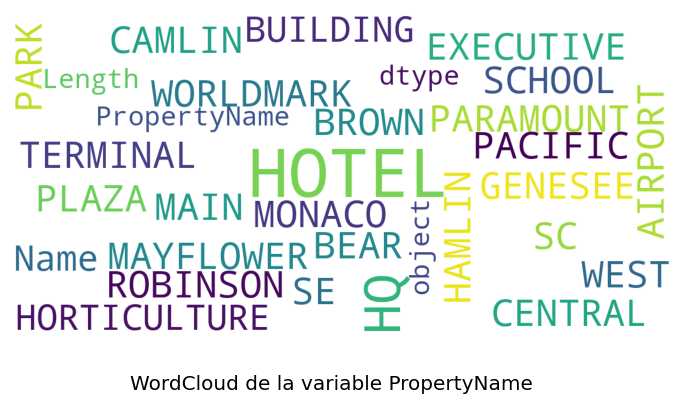

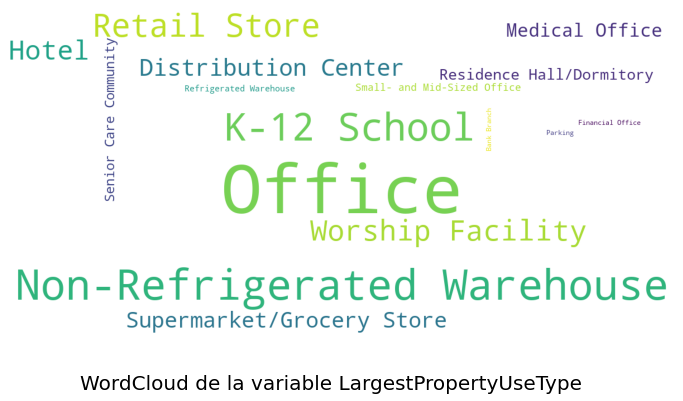

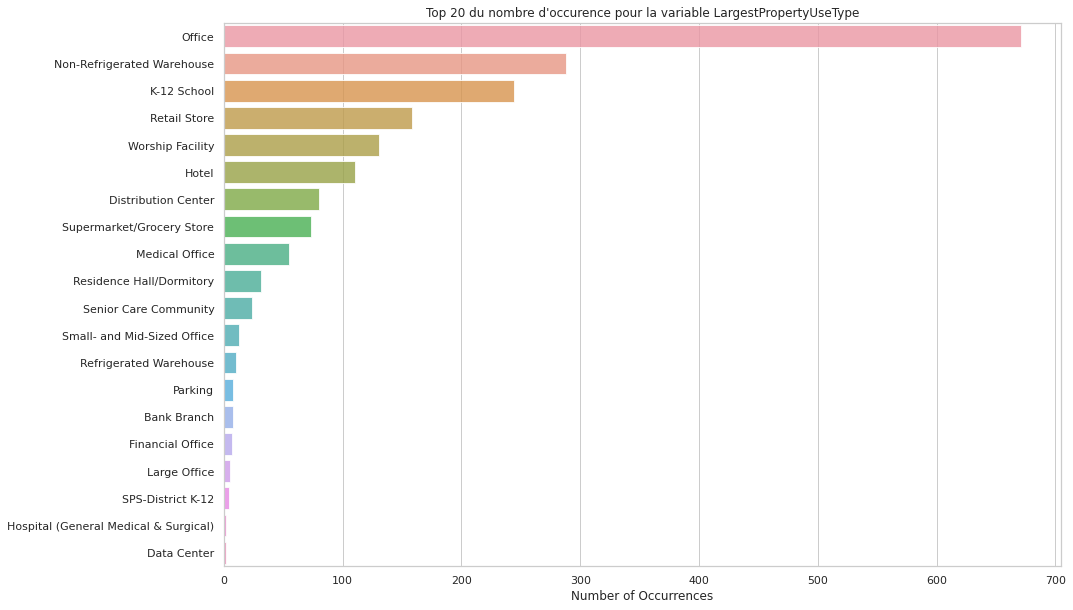

In [ ]:
graphe_objet(df_non_numeric)

A seattle, on retrouve surtout des bureaux, des entrepôts non réfrigérés, des écoles, ...

### <font color='blue'>Type Category : Pie Plot / Barplot</font>

In [ ]:
object_df = df_non_numeric.select_dtypes(include = ['category'])
columns_object_df = list(object_df)
columns_object_df

['DataYear',
 'BuildingType',
 'YearBuilt',
 'Neighborhood',
 'PrimaryPropertyType']

In [ ]:
def graphe_category(dataframe):
    object_df = dataframe.select_dtypes(include = ['category'])
    columns_object_df = list(object_df)
    for col in columns_object_df :
      if col=='DataYear' or col=='BuildingType' or col=='Neighborhood' :
        values = dataframe[col].value_counts()
        labels = dataframe[col].value_counts().index
        # Plot
        plt.figure(figsize=(20,10))
        ttl=plt.title("Représentation de la variable {}" .format(col), fontsize = 24) 
        plt.pie(values, labels=labels,
        autopct='%.1f%%', shadow=True, textprops={'fontsize': 20})
        ttl.set_position([0.5, 1.05])
        plt.axis('equal')
        plt.tight_layout() 
        plt.show()
        print(" ")
        print(" ")
        print(" ")
        print(" ")
      else :
        print(" ")
        print(" ")
        plt.figure(figsize=(20,10))
        ax=sns.countplot(x = dataframe[col])
        plt.title("Représentation de la variable {}" .format(col), fontsize = 24)
        plt.rc('xtick', labelsize=14)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
        plt.tight_layout()
        plt.show()
        print(" ")
        print(" ")
        print(" ")
        print(" ")

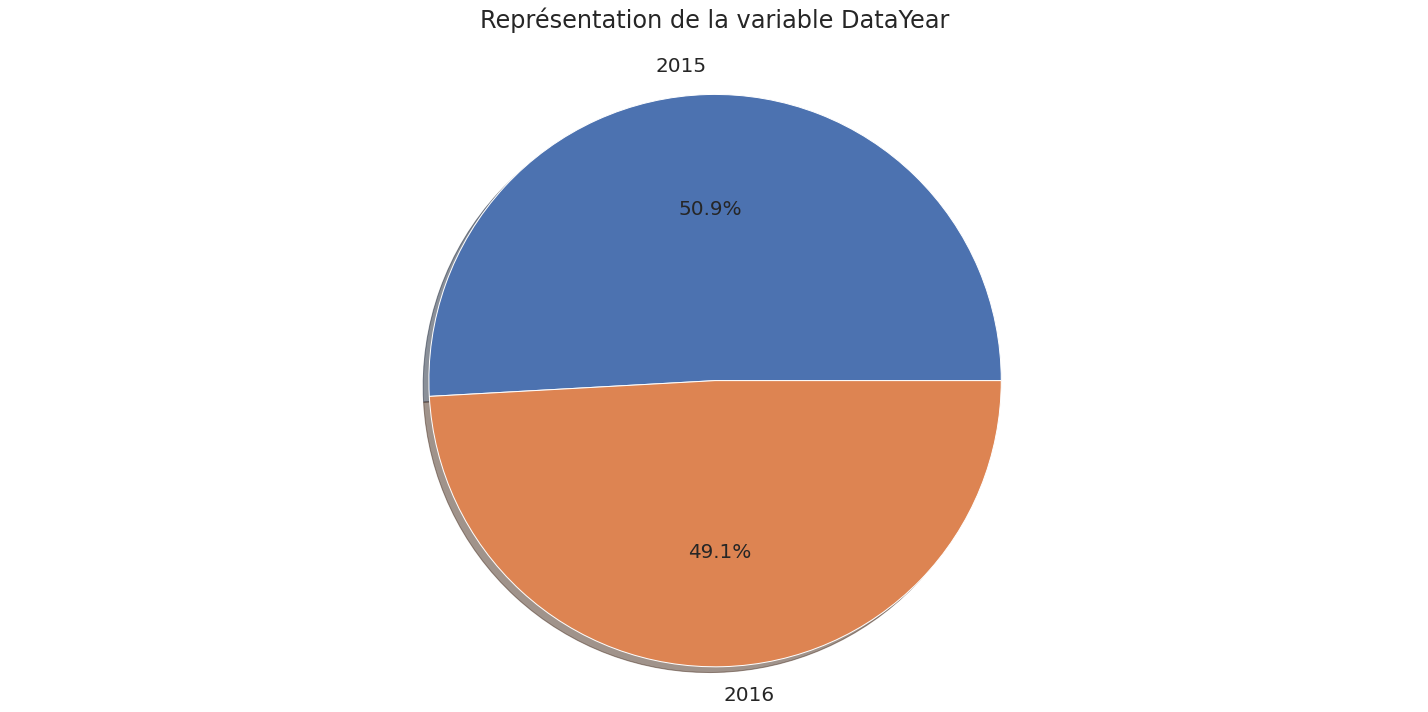

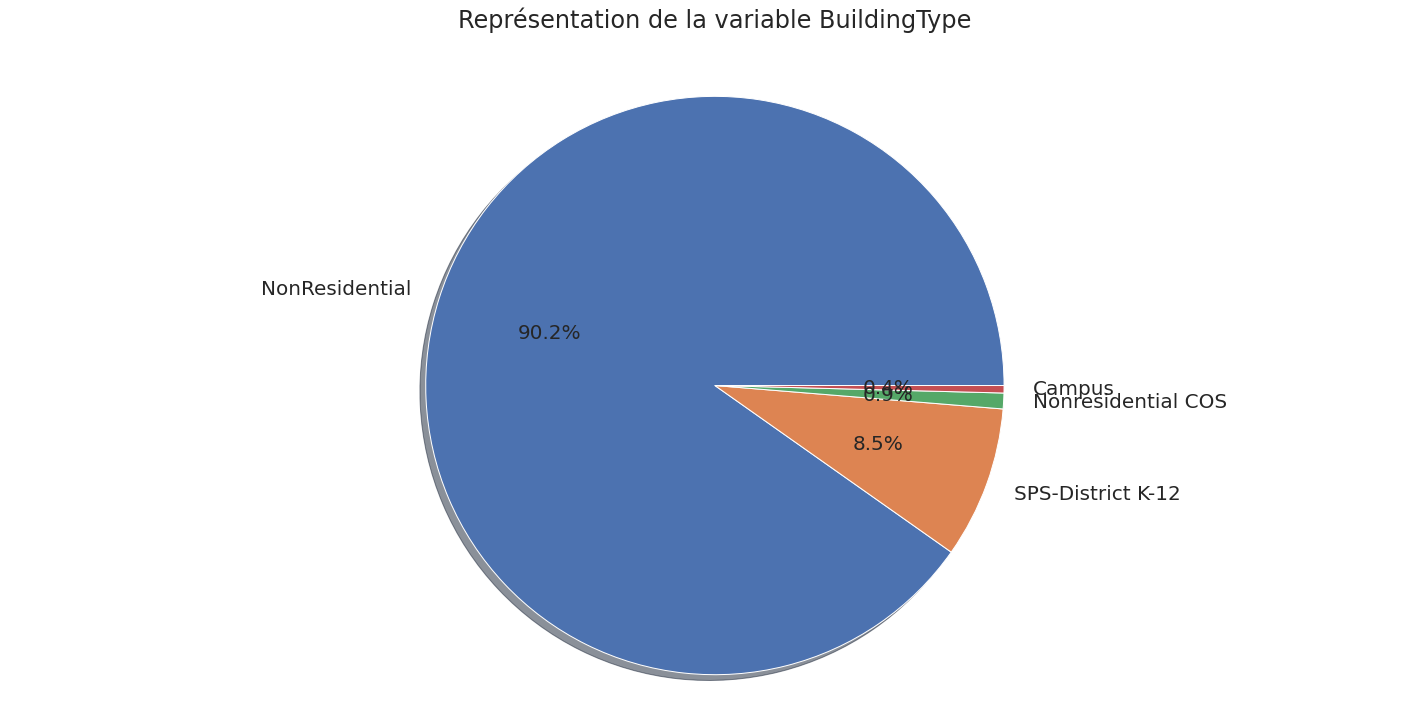

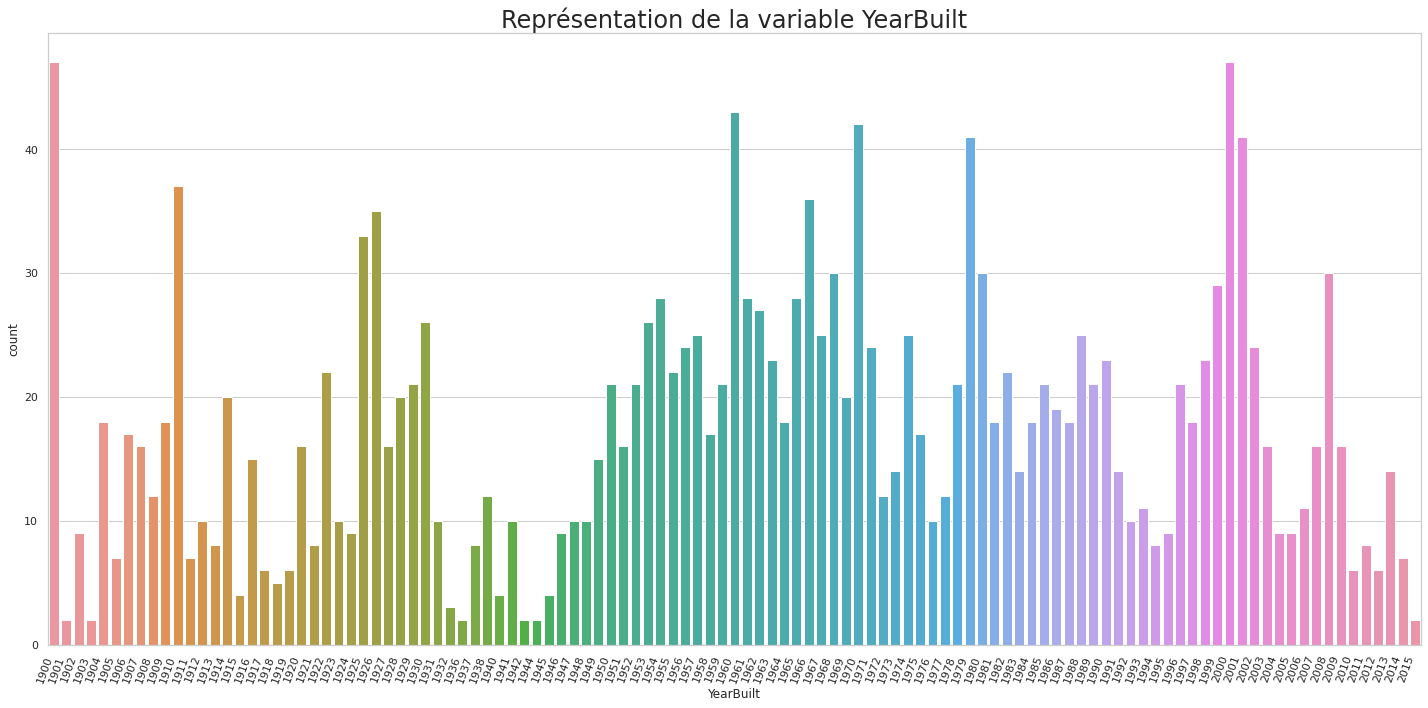

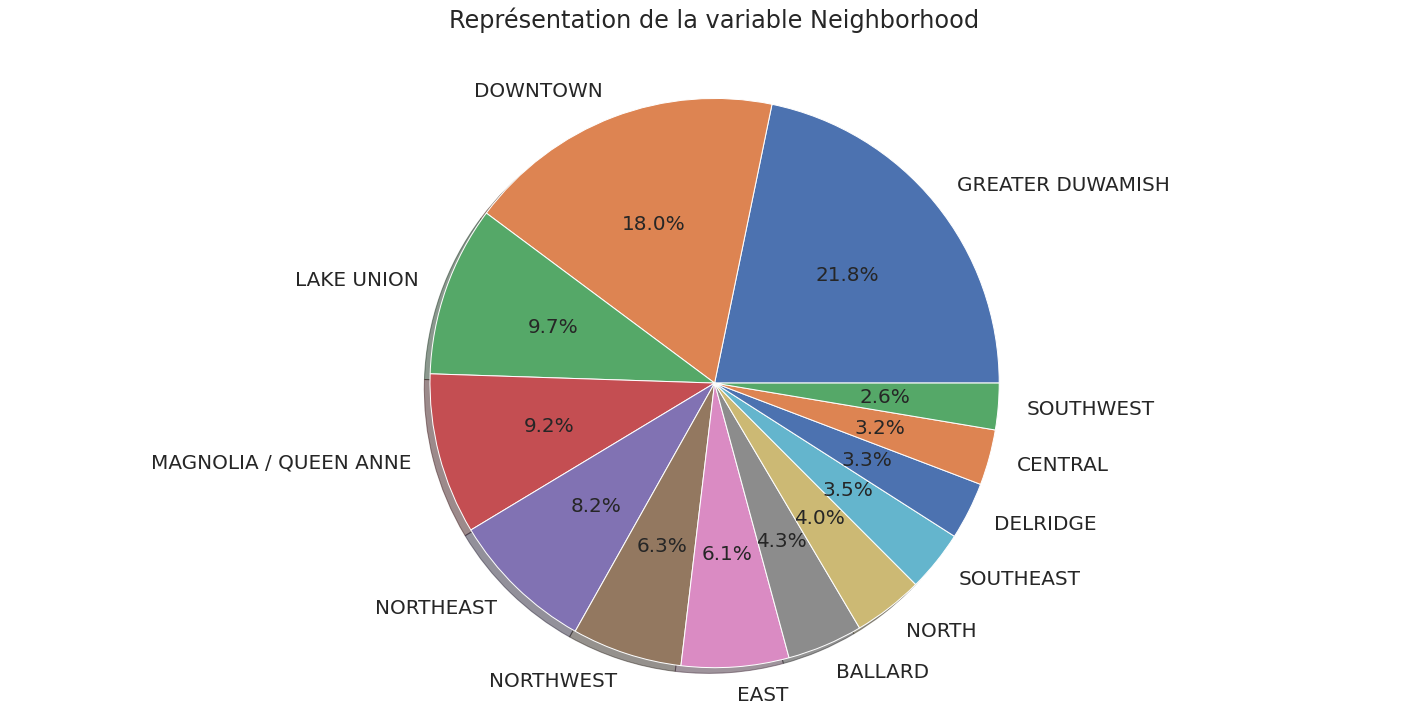

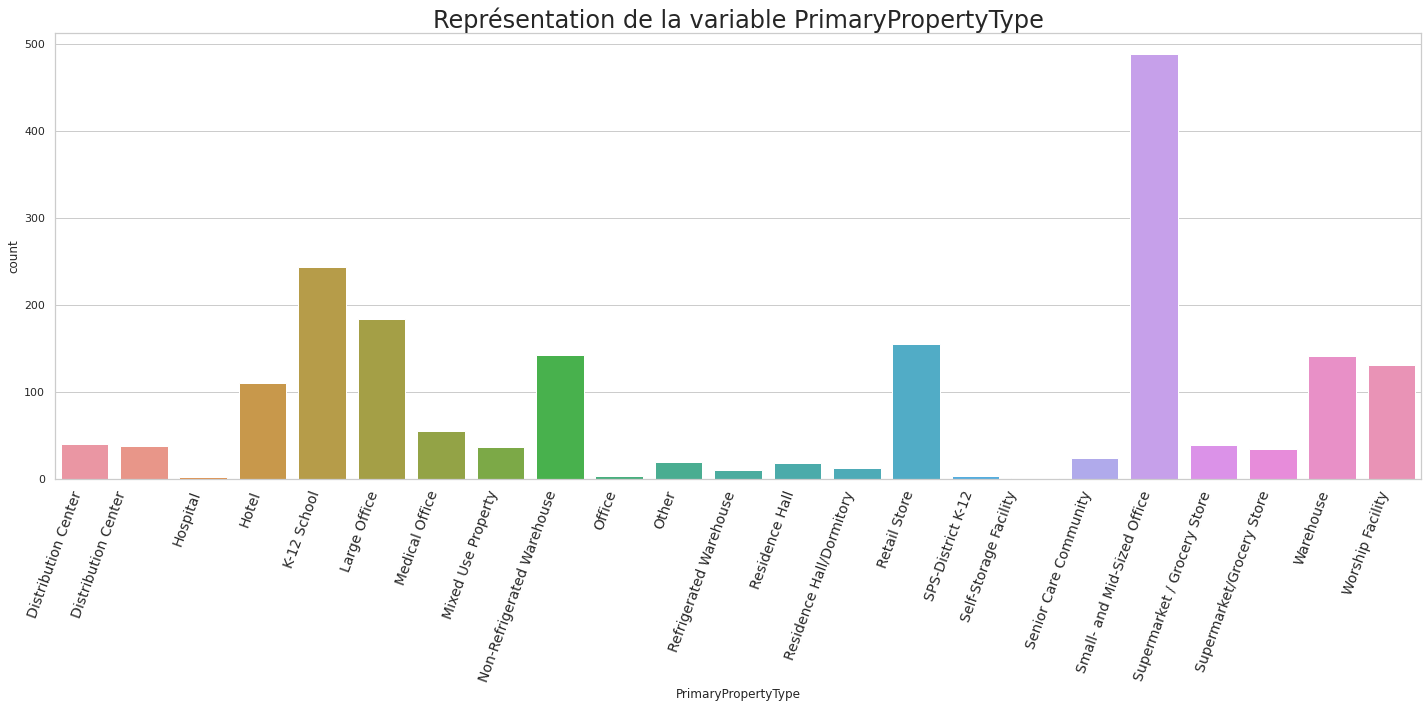

In [ ]:
graphe_category(df_non_numeric)

On peut dire que l'on retrouve en proportions équivalentes des données sur l'année 2015 et sur l'année 2016. La majorité des bâtiments retenus pour notre étude sont qualifiés de non résidentiels, de commerces et d'écoles. Les bâtiments ont été construits de manière continue des années 1900 à nos jours. Cependant, il y a eu une période où le nombre de construcions a chuté (de 1932 à 1947 : dû au Krash boursier de 1929 et à la seconde guerre mondiale ?). Les quartiers de Greater Duwamish et downton sont beaucoup plus représentés que les autres quartiers. On peut dire qu'il y a donc beaucoup de bâtiments de notre jeu de données qui se trouvent dans ces quartiers et on peut émettre l'hypothèse que ce sont les quartiers les plus importants de Seattle. La majorité des bâtiments sont de petits et moyens bureaux, des écoles puis des bureaux plus grands et des entrepôts.

## <font color='green'>Analyse Multivariée</font>

On peut émettre l'hypothèse que la quantité totale d'énergie utilisée est proportionnelle à la surface totale du bâtiment, à l'utilisation principale du bâtiment et à la surface du bâtiment réservée à celle-ci. L'émission de CO2 est proportionnelle à la consommation d'énergie car les gaz à effet de serre sont la résultante des énergies consommées.

### <font color='blue'>Recherche de corrélation entre les variables</font>

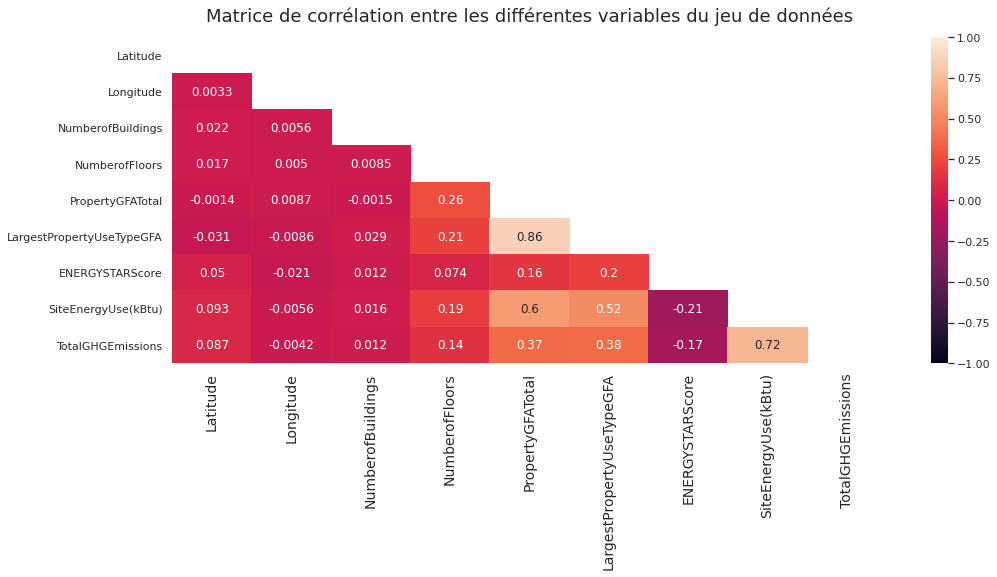

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_CO2_elec.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_CO2_elec.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Matrice de corrélation entre les différentes variables du jeu de données', fontdict={'fontsize':18}, pad=16);

Le coefficient de corrélation est compris entre -1 et 1.
Plus le coefficient est proche de 1, plus la relation linéaire positive entre les variables est forte.
Plus le coefficient est proche de -1 plus la relation linéaire négative entre les variables est forte.
Plus le coefficient est proche de 0, plus la relation linéaire entre les variables est faible.

Pour déterminer les variables ayant un lien fort entre elles, une limite de 0,25 pour le coefficient de corrélation a été arbitrairement choisi.

Analyse des liens entre variables : 

* PropertyGFATotal : forte corrélation avec:
    * NumberofFloors
    * LargestPropertyUseTypeGFA
    * SiteEnergyUse(kBtu)
    * TotalGHGEmissio

* LargestPropertyUseTypeGFA : forte corrélation avec:
    * SiteEnergyUse(kBtu)
    * TotalGHGEmissio

* SiteEnergyUse(kBtu) : forte corrélation avec :  
    * TotalGHGEmission

    * Ce sont les variables que l'on cherche à prédire

* TotalGHGEmission : forte corrélation avec :
    * PropertyGFATotal
    * SiteEnergyUse(kBtu)
    * LargestPropertyUseTypeGFA

### <font color='blue'>Scatter plot de certaines variables</font>

In [ ]:
df_CO2_elec.columns

Index(['DataYear', 'PropertyName', 'BuildingType', 'YearBuilt', 'Neighborhood',
       'Latitude', 'Longitude', 'PrimaryPropertyType', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions'],
      dtype='object')

In [ ]:
#import library
import scipy.stats as stats
from scipy.stats.stats import pearsonr

In [ ]:
def scatter_plot(dataframe_point, colX, colY, dataframe_reg):
  print("Le coefficient de Pearson est de {}".format(np.corrcoef(dataframe_reg[colX], dataframe_reg[colY])[0][1]))
  sns.set(style="darkgrid", color_codes=True)
  sns.set(rc={'figure.figsize':(15,10)})
  r, p = stats.pearsonr(dataframe_reg[colX], dataframe_reg[colY])
  slope, intercept, r_value, p_value, std_err = stats.linregress(dataframe_reg[colX], dataframe_reg[colY])
  ax = sns.scatterplot(data=dataframe_point, x=colX, y=colY)
  p=sns.regplot(data=dataframe_reg, x=colX, y=colY, scatter=False, ci=68, ax=ax, line_kws={'color':'red'})
  # plot legend
  #ax.legend()   #"
  p.annotate(f'y={slope:.2f}x+{intercept:.1f}\n R2={r*r:.4f}',
                      xy=(0.1, 0.9), xycoords='axes fraction',
                      ha='left', va='center',
                      color='black',
                      fontweight="bold",
                      bbox={'boxstyle': 'round', 'fc': 'pink', 'ec': 'purple'})
  
  plt.title("Relation entre la variable {} et la variable {}".format(colX, colY), fontsize=18, fontweight="bold")
  print(" ")
  print(" ")
  #ax.text(700, ,"y={0:.1f}x+{1:.1f}\n R2={2:.1f}".format(slope,intercept, r*r), fontsize=12, color=blue)
  #plt.legend(loc="lower right")
  plt.tight_layout()
  plt.show()

Le coefficient de Pearson est de 0.861254017571478
 
 


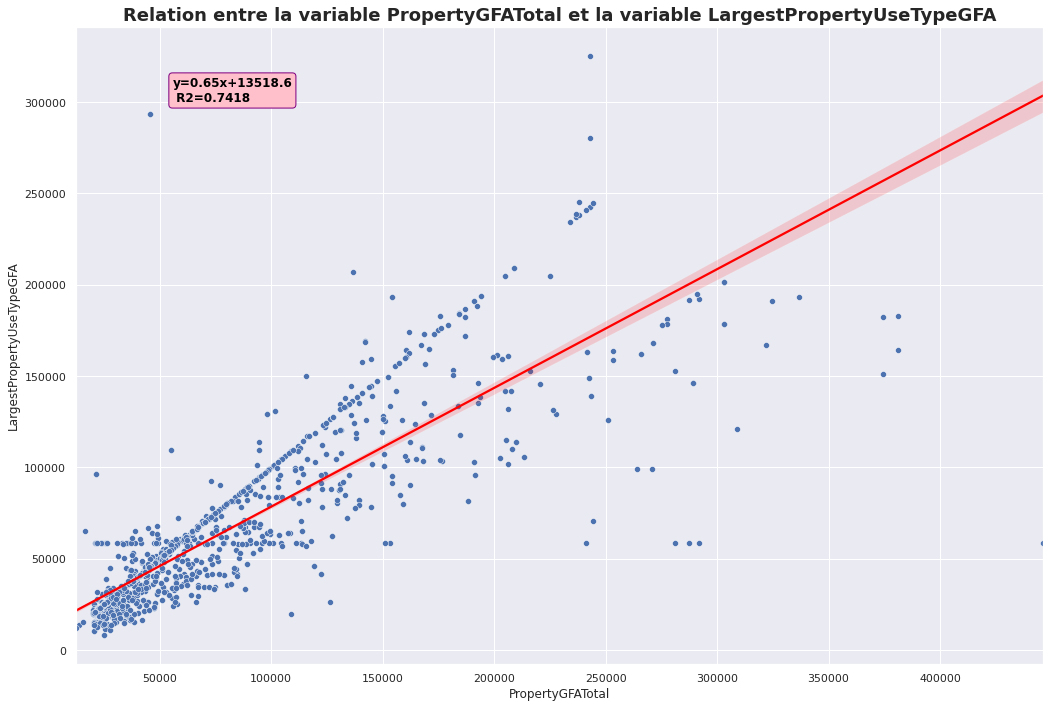

In [ ]:
scatter_plot(df_CO2_elec, 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', df_CO2_elec)

Avec ce graphique, on peut dire que plus un bâtiment a de surface, plus grande sera la part réservée à une activité principale.

Le coefficient de Pearson est de 0.5190111127283084
 
 


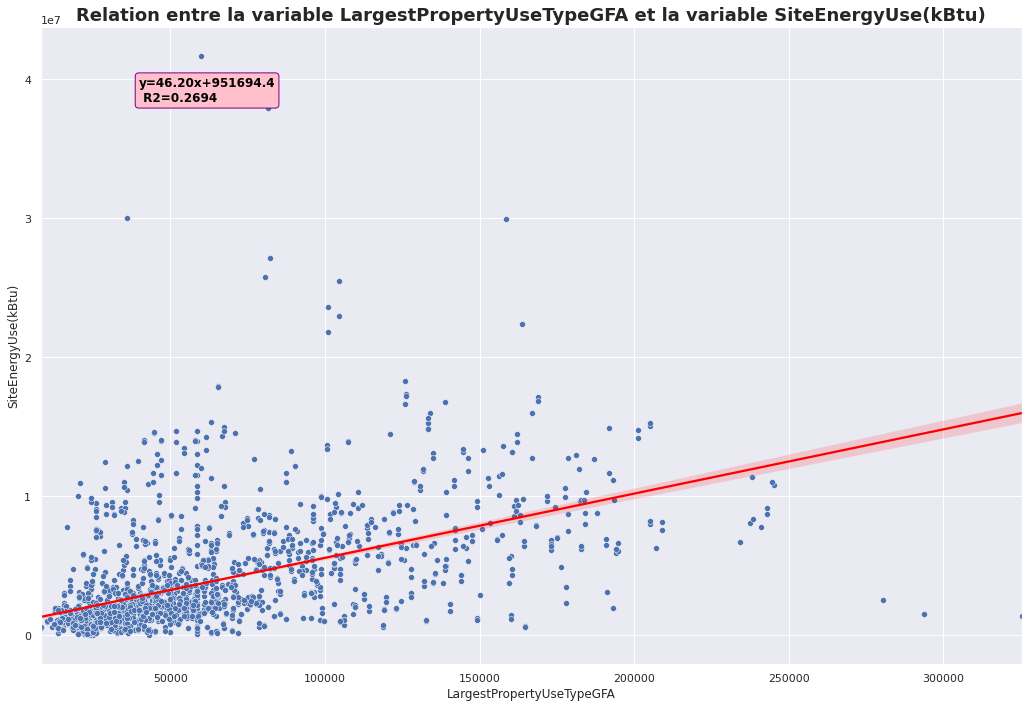

In [ ]:
scatter_plot(df_CO2_elec, 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', df_CO2_elec)

Avec ce graphique, on peut dire que plus la surface réservée à une activité principale augmente, plus la quantité d'énergie utilisée par an augmente. 

Le coefficient de Pearson est de 0.7240765938278869
 
 


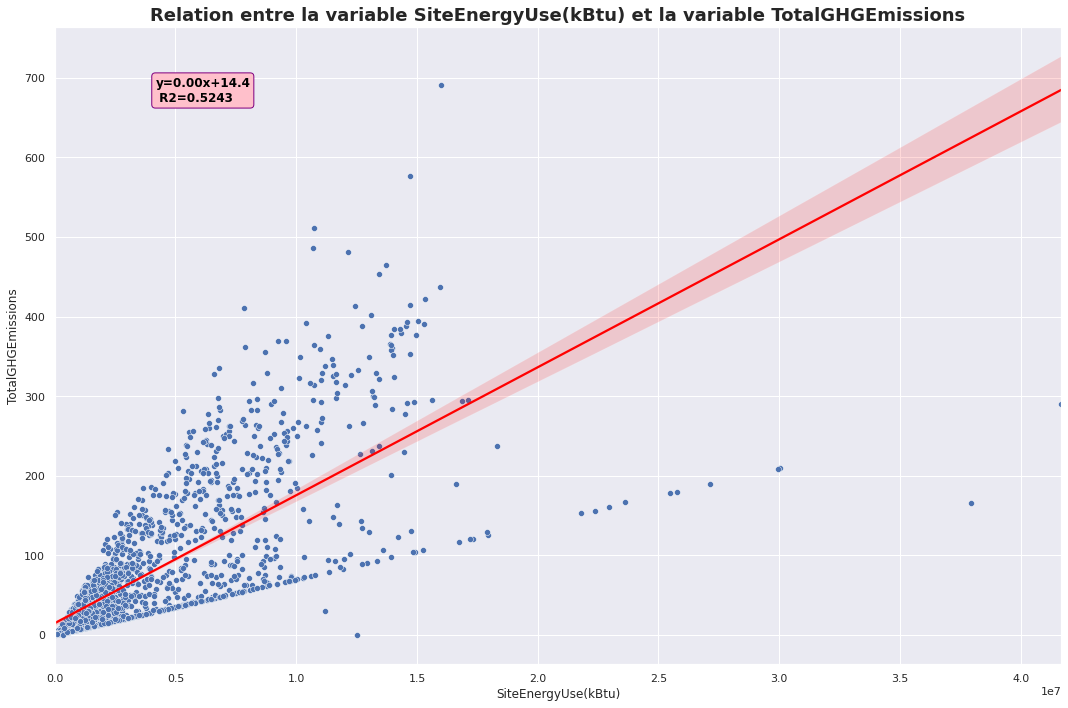

In [ ]:
scatter_plot(df_CO2_elec, 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', df_CO2_elec)

Avec ce graphique, on peut dire que plus on utilise d'énergie, plus ont émet de gaz à effet de serre.

### <font color='blue'>Test d'indépendance pour prouver la dépendance des variables avec le nutriscore : test d'indépendance du chi2</font>


In [ ]:
#import library
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
def test_chi2(serie1, serie2):
    
    alpha = 0.05 
    
    #H0 : les variables sont indépendantes
    
    table_contingence = pd.crosstab(serie1.array, serie2.array)
    stat_chi2, p, dof, expected_table = chi2_contingency(table_contingence.values)
    
    critical = chi2.ppf(1-alpha, dof) #

    if p <= alpha:
        print('Variables dépendantes (H0 rejetée) car p = {} <= alpha = {}'.format(p, alpha))
        return False
    
    else:
        print('Variables indépendantes (HO acceptée) car p = {} > alpha = {}'.format(p, alpha))
        return True

In [ ]:
#cut permet de regrouper les données numérique en bins, catégories (ici 20) pour transformer une variable numérique en catégorielle pour pouvoir faire un test du chi2
x = pd.cut(df_CO2_elec['SiteEnergyUse(kBtu)'], 20)
for column in df_CO2_elec.select_dtypes(include = ['int32','float64']).columns:
  if column == 'SiteEnergyUse(kBtu)':
    pass
  else:
    print('test d\'indépendance entre {} et {}'.format('SiteEnergyUse(kBtu)',column))
    y = pd.cut(df_CO2_elec[column], 20).astype('category')
    test_chi2(x, y)
    print('________________________________________________________________________________________________\n')

test d'indépendance entre SiteEnergyUse(kBtu) et Latitude
Variables dépendantes (H0 rejetée) car p = 6.034729189124449e-09 <= alpha = 0.05
________________________________________________________________________________________________

test d'indépendance entre SiteEnergyUse(kBtu) et Longitude
Variables indépendantes (HO acceptée) car p = 0.7313611279031831 > alpha = 0.05
________________________________________________________________________________________________

test d'indépendance entre SiteEnergyUse(kBtu) et PropertyGFATotal
Variables dépendantes (H0 rejetée) car p = 7.8515801295385e-311 <= alpha = 0.05
________________________________________________________________________________________________

test d'indépendance entre SiteEnergyUse(kBtu) et LargestPropertyUseTypeGFA
Variables dépendantes (H0 rejetée) car p = 2.1157712349384435e-185 <= alpha = 0.05
________________________________________________________________________________________________

test d'indépendance entre 

In [ ]:
#cut permet de regrouper les données numérique en bins, catégories (ici 20) pour transformer une variable numérique en catégorielle pour pouvoir faire un test du chi2
x = pd.cut(df_CO2_elec['TotalGHGEmissions'], 20)
for column in df_CO2_elec.select_dtypes(include = ['int32','float64']).columns:
  if column == 'TotalGHGEmissions':
    pass
  else:
    print('test d\'indépendance entre {} et {}'.format('TotalGHGEmissions',column))
    y = pd.cut(df_CO2_elec[column], 20).astype('category')
    test_chi2(x, y)
    print('________________________________________________________________________________________________\n')

test d'indépendance entre TotalGHGEmissions et Latitude
Variables dépendantes (H0 rejetée) car p = 7.223277454604092e-05 <= alpha = 0.05
________________________________________________________________________________________________

test d'indépendance entre TotalGHGEmissions et Longitude
Variables indépendantes (HO acceptée) car p = 0.8480703034732656 > alpha = 0.05
________________________________________________________________________________________________

test d'indépendance entre TotalGHGEmissions et PropertyGFATotal
Variables dépendantes (H0 rejetée) car p = 1.356598907863798e-82 <= alpha = 0.05
________________________________________________________________________________________________

test d'indépendance entre TotalGHGEmissions et LargestPropertyUseTypeGFA
Variables dépendantes (H0 rejetée) car p = 1.9114645190250563e-73 <= alpha = 0.05
________________________________________________________________________________________________

test d'indépendance entre TotalGHG